In [144]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
np.set_printoptions(threshold=np.inf)
from PIL import Image
import imageio
import os
from skimage.metrics import mean_squared_error as  compare_ssim
import csv
def show(image):
    # cv2.imwrite('rocks_within_lava.jpg', rocks_within_lava)
    # cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
    # cv2.resizeWindow("Image", 500, 600)
    cv2.imshow("Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def ishow(image):
    fig, ax = plt.subplots(figsize=(6, 6)) 
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap="tab20b") 
    ax.axis('off') 
    plt.show()

In [145]:
S = (150,85)

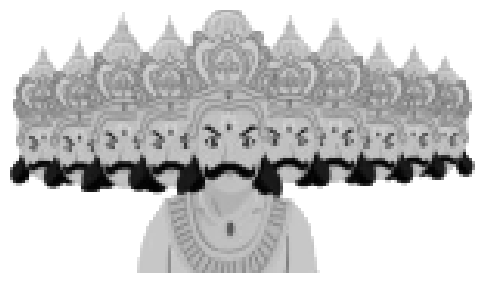

In [158]:
img = cv2.imread('test/r4.jpg')
mask = np.all(img >= 200, axis=-1)
img[mask] = [255, 255, 255]
gray = 255 - cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
x, y, w, h = cv2.boundingRect(cv2.findNonZero(gray))
rect1 = img[y:y+h, x:x+w]
# ishow(rect1)
rect1 = cv2.convertScaleAbs(rect1)
gray1 = cv2.cvtColor(rect1, cv2.COLOR_BGR2GRAY)
gray1 = cv2.resize(gray1,S)
# gray1= cv2.GaussianBlur(gray1, (7,7),2)
ishow(gray1)

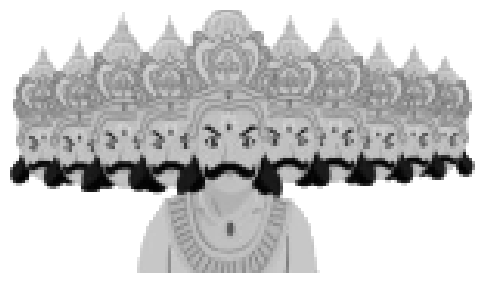

In [161]:
img = cv2.imread('test/r15.jpg')
mask = np.all(img >= 200, axis=-1)
img[mask] = [255, 255, 255]
gray = 255 - cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
x, y, w, h = cv2.boundingRect(cv2.findNonZero(gray))
rect2 = img[y:y+h, x:x+w]
# ishow(rect1)
rect2 = cv2.convertScaleAbs(rect2)
gray2 = cv2.cvtColor(rect2, cv2.COLOR_BGR2GRAY)
gray2 = cv2.resize(gray2,S)
# gray2= cv2.GaussianBlur(gray2, (7,7),2)
ishow(gray2)

876.3367058823529

In [151]:
# gt_1 = gray1.ravel()
# print(np.array2string(gt_1, separator=","))

[255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,216,247,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,153,199,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,2

In [140]:
gt_1arr = np.array([255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,216,247,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,153,199,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,231,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,184,193,164,227,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,229,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,199,
 136,255,255,255,255,255,255,255,255,255,255,255,255,255,199,212,175,182,
 135,250,255,255,255,255,255,255,255,255,255,255,255,255,253,173,209,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,254,255,255,255,255,255,255,255,255,255,
 255,255,255,255,231,165,192,170,254,255,255,255,255,255,255,255,255,255,
 255,255,179,209,178,179,161,129,255,255,255,255,255,255,255,255,255,255,
 255,255,150,183,158,253,255,255,255,255,255,255,255,255,255,255,255,255,
 254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,155,236,255,255,
 255,255,255,255,255,255,255,255,255,255,146,171,100,214,184,255,255,255,
 255,255,255,255,255,255,255,255,160,164,145,136,130,193,255,255,255,255,
 255,255,255,255,255,255,255,213,215, 94,173,147,249,255,255,255,255,255,
 255,255,255,255,255,255,160,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,219,180,199,251,255,255,255,255,255,255,255,255,255,255,142,167,118,
 127,119,192,255,255,255,255,255,255,255,255,255,252,167,176,176,177,176,
 176,168,154,255,255,255,255,255,255,255,255,255,255,161,134,107,124,148,
 233,255,255,255,255,255,255,255,255,255,255,170,172,224,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,253,151,255,255,255,255,255,
 255,255,255,255,255,255,213,171,189,201,173,255,255,255,255,255,255,255,
 255,255,255,181,113, 99, 77,112,128,255,255,255,255,255,255,255,255,255,
 172,169,177,176,176,168,172,167,159,221,255,255,255,255,255,255,255,255,
 255,149,140, 86, 78,113,227,255,255,255,255,255,255,255,255,255,193,209,
 180,157,237,255,255,255,255,255,255,255,255,255,255,166,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,227,255,255,255,255,255,255,255,255,255,255,255,255,172,
 186,191,255,255,255,255,255,255,255,255,255,255,161,184,190,201,208,239,
 255,255,255,255,255,255,255,255,153,153,168,160,120, 87,139,160,250,255,
 255,255,255,255,255,255,190,110,134,135,137,138,136,136,115,191,255,255,
 255,255,255,255,255,255,149,119, 91,105,144,168,152,171,255,255,255,255,
 255,255,255,236,198,198,178,168,160,255,255,255,255,255,255,255,255,255,
 201,184,176,255,255,255,255,255,255,255,255,255,255,255,236,249,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,217,167,248,255,255,255,255,255,255,
 255,255,255,255,181,178,177,207,198,255,255,255,255,255,255,255,255,248,
 147,166,162,178,169,231,255,255,255,255,255,255,255,183,139,160,179,185,
 135, 88,171,124,193,255,255,255,255,255,255,255,121,165,174,175,197,202,
 201,175,182,127,230,255,255,255,255,255,255,203,144,167, 88,122,184,177,
 151,153,221,255,255,255,255,255,255,234,165,178,163,147,151,255,255,255,
 255,255,255,255,255,234,204,180,172,192,255,255,255,255,255,255,255,255,
 255,253,186,194,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,225,157,190,194,
 255,255,255,255,255,255,255,255,255,255,147,169,179,210,166,255,255,255,
 255,255,255,255,249,154,165,182,158,159,158,163,229,255,255,255,255,255,
 255,161,129,146,136,138,105,109,195, 60,181,255,255,255,255,255,235,131,
 196,215,167,197,191,203,194,174,198,213,136,221,255,255,255,255,255,211,
  70,205,112, 97,135,138,140,106,217,255,255,255,255,255,250,159,156,161,
 162,159,149,148,255,255,255,255,255,255,255,183,215,181,175,144,255,255,
 255,255,255,255,255,255,255,205,190,171,224,255,255,255,255,255,255,255,
 255,255,255,237,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,134,178,180,214,195,255,255,255,255,255,255,255,253,214,138,154,
 156,163,143,233,255,255,255,255,255,255,167,137,179,198,187,189,174,148,
 169,250,255,255,255,255,183,137,184,182,204,214,171,156,199,102, 89,224,
 255,255,255,236,136,175,203,209,172,160,185,176,185,152,205,208,194,130,
 216,255,255,255,238,113,121,204,182,151,216,199,177,188,129,232,255,255,
 255,255,174,145,174,188,193,183,164,139,209,255,255,255,255,255,239,183,
 161,157,156,148,219,255,255,255,255,255,255,255,255,205,185,178,140,255,
 255,255,255,255,255,255,255,255,211,157,252,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,245,138,156,165,177,188,255,255,255,255,255,
 255,255,240,114,126,127,134,131,128,137,247,255,255,255,255,255,168,113,
 113,120,129,118,116, 98,165,253,255,255,252,148,182,221,193,174,202,196,
 102,181,179,156,208,154,196,255,242,130,198,174,177,182,172,149,162,127,
 153,147,185,180,174,179,148,223,255,241,120,206,151,140,185,104,195,201,
 156,207,217,128,237,255,255,255,205, 83,117,120,128,125,117,112,209,255,
 255,255,255,255,192,121,127,134,130,128,115,244,255,255,255,255,255,255,
 245,156,163,160,131,245,255,255,255,255,255,255,255,235,196,175,185,255,
 255,255,255,255,255,255,255,255,255,255,255,255,252,139,150,151,140,147,
 149,209,255,255,255,255,255,255,167,121,148,155,158,157,144,109,220,255,
 255,255,251,151,201,168,189,209,214,185,175,200,165,157,254,253,138,170,
 192,197,198,154,169,142,172,197,122,135,197,179,158,173,107,207,218,173,
 180,206,181,180,117,170,135,176,206,201,160,199,216,147,211,133,184,195,
 130,118,199,182,126,167,146,203,193,182,125,222,255,205,140,207,175,179,
 214,205,185,182,162,207,255,255,255,255,138,141,154,158,156,145,112,205,
 255,255,255,255,255,251,148,152,143,141,147,133,252,255,255,255,255,255,
 255,197,205,178,150,236,255,255,255,255,255,255,255,255,255,255,255,255,
 158,151,165,170,172,166,151,161,255,255,255,255,255,224,136,179,190,213,
 210,179,169,182,132,255,255,246,135,208,215,178,182,200,189,199,155,211,
 215,181,123,134,209,177,189,194,180,152,154,139,183,177,115,133,194,174,
 198, 93,181,208,215,188,151,159,164,131,171,178,153,155,161,162,150,215,
 212,191,139,198,178,198,129,114,149,192,157,132,173,179,197,177,200,155,
 162,141,217,212,158,201,185,197,164,199,218,184,180,255,255,203,146,182,
 176,210,215,190,181,112,255,255,255,255,255,188,153,163,168,172,156,149,
 173,255,255,255,255,255,245,155,143,135,131,213,255,255,255,255,255,255,
 255,255,255,255,255,252,133,180,188,200,197,165,175,129,236,255,255,255,
 167,174,215,186,178,199,192,195,168,213,198,122,252,150,171,181,180,183,
 147,163,152,155,144,189,172,114, 95,206,217,194,156,189,200,177,119,186,
 217,103,124,165,171,160,109,173,170,178,178,186,148,147,141,164,179,180,
 177,133,153,143,160,186,174,180,173,156,175,168,190,121, 97,194,188,143,
 167,203,180,156,218,210,140,106,157,184,156,156,157,157,152,195,184,170,
 176,147,168,169,223,190,185,194,192,182,192,213,153,235,255,255,255,135,
 180,162,183,198,194,173,134,250,255,255,255,255,170,174,180,183,184,154,
 220,255,255,255,255,255,255,255,255,255,211,150,216,181,194,192,193,183,
 193,208,154,216,255,172,168,184,186,181,153,157,160,155,182,183,158,109,
 152,216,189,175,201,188,177,132,142,156,178,204,138,105,176,188,201,207,
 148,158,157,105,181,205,112, 82,114,152,152,123,145,212,162,188,207,195,
 174,158,124,201,175,150,179,175,123,167,182,204,204,165,194,202,134,149,
 152,122, 73,101,204,183,114,155,153,173,205,198,179,118,119,198,179,150,
 149,134,175,198,201,161,210,193,104,138,183,187,151,160,167,148,185,183,
 178,158,231,255,162,190,213,165,199,199,197,179,214,147,255,255,255,255,
 123,142,154,159,157,143,173,255,255,255,255,255,255,255,255,204,162,182,
 186,182,156,156,162,152,199,187,170,120,149,199,205,165,203,186,171,133,
 133,167,178,191,110,132,201,216,206,147,164,163,134,178,179,132,163,129,
  94,180,164,189,190,185,163,151,107,172,198,140,113,127,111,155,149, 53,
 204,220,182,153,174,190,171,128,184,183,165,146,150,178,153,150,175,189,
 160,151,209,219,106,145,152,128,123,115,111,208,182, 99,152,176,190,191,
 172,184, 97,115,161,127,179,169,149,165,158,170,215,206,166,109,159,190,
 170,131,144,170,193,199,164,213,161,125,151,184,190,156,161,157,154,178,
 186,172,158,234,255,159,189,178,189,209,197,181,190,183,255,255,255,255,
 255,255,199,182,216,157,192,187,161,150,132,170,201,192,125,117,168,199,
 211,152,159,164,131,179,174,131,161,114,122,178,185,186,187,156,148,134,
 164,184,175,185,119, 93,161,217,173,161,198,212,173,142,152,189,173, 92,
 113,156,149,145,148, 50,200,220,206,146,156,151,146,135,205,156,156, 91,
 138,160,175,122,159,156,155,163,213,216, 87,129,155,139,169,112, 92,144,
 193,169,125,193,207,179,159,213,198, 80,113,188,172,181,157,146,148,171,
 185,187,170,159,107,149,130,175,181,136,164,157,169,209,193,140,122,163,
 204,176,150,154,155,191,189,165,215,169,143,130,196,178,169,173,169,183,
 198,164,178,255,255,255,255,215,155,195,205,171,154,155,137,178,173,140,
 159,135,107,176,168,190,187,169,155,135,171,176,178,176,110, 85,208,191,
 160,200,207,182,166,140,179,156,168,183,158, 73,202,214,198,147,156,171,
 141,119,182,216, 92, 89,127,173,203,116,113, 87, 88,144,197,162,151,164,
 129,188,188,170,104,100,104,144,174,153,146,153,158,189,179,125, 82,105,
 122,199,174,146, 84, 89,204,184,138,135,164,154,170,217,218, 69,143,180,
 162,165,179,123,172,190,211,188,165,209,121,107,164,175,171,166,136,153,
 184,190,188,174,133,101,157,155,162,180,141,156,155,178,202,187,132,119,
 157,181,158,137,151,181,196,172,201,197,255,255,236,169,181,194,195,180,
 158,127,178,163,175,160,138,104,155,215,170,172,202,184,163,149,177,148,
 161,188,100, 99,219,210,147,160,166,160,119,174,161,140,150,174,194, 77,
 125,208,202,150,150,145,100,168,189,200, 94, 63,131,158,197,173, 94,101,
  95, 66,165,180,169,160,107,213,164,161, 80, 84, 77,167,170,178,111,159,
 169,183, 69, 92, 98, 96,145,202,167,121, 77, 87,183,196,175,114,146,143,
 189,213,162, 66,184,168,152,142,174,171,137,169,166,151,185,216,179, 93,
 186,166,147,175,135,171,192,196,160,192,204, 91,148,137,182,160,178,133,
 159,178,190,181,184, 98,116,152,134,182,148,156,163,181,206,180,192,255,
 171,214,198,155,181,183,150,163,171,143,169,190,127, 98,165,218,190,150,
 159,156,127,178,150,126,140,165,159, 66,187,211,168,147,152,146,165,172,
 147, 96,103,164,186,159, 67, 80,152,177,163, 98,139,182,196,219, 99, 95,
  87,169,168,215,111,107,101,106, 97,178,171,144,145,215,160,170, 75, 74,
  92,177,162,176,139,165,187,157,110,102,111,111,200,175,172, 86, 90,101,
 206,202,182,149, 91,163,181, 95, 69,131,182,176, 97,111,144,173,132,155,
 154,145,201,206, 88,131,168,147,117,156,173,128,152,159,146,214,213, 94,
 111,194,170,144,169,163,153,187,179,156,207,198, 97,121,185,161,177,138,
 160,186,195,165,179,223,163,205,209,153,155,149,129,175,146, 91,141,171,
 199, 89, 66,160,198,152,148,141,161,170,149, 76,116,172,192,116, 63,103,
 185,165,167,118,173,158,137, 76,126,124,163,217,120,102, 73,170,123,126,
 156,183,186,211,219,216,171,121,120,153,123,126, 99,102, 30,167,150,148,
 146,220,188,141,150,107,150,138,179,178,121,154,178, 83,101, 97,125,109,
 158,127,113,163,216,219,215,187,183,171,130,102,120,108, 85,210,166,125,
 130, 76,149,173,169,150,163,179,156, 59, 81,178,172,119, 79,142,168,140,
 155,149,172,182,109, 99,161,179,156, 86,139,177,135,159,155,170,213,163,
  99,147,178,147,158,169,159,194,167,168,217,142,255,189, 98,186,164,151,
 174,158,129, 82,102,161,204,144,112,101,113,164,147,105,167,161,126, 70,
  83,154,160,207, 99, 81,154,189,144,134,174,153,141, 74, 75,120,158,195,
 182,125, 78,162, 90,131,157,184,186,182,185,191,199,207,216,215,221,220,
 219,219,148,167,148,170,117,201,219,194,153,146,152,170,177,182,130,143,
 161,124,223,216,217,220,215,214,213,202,191,187,187,186,180,180,133, 99,
  81,104,154,209,160,115, 69, 73,163,156,185,127,156,176, 83, 96,194,177,
 151, 81, 78,122,160,174,135,153,168, 92,119,106,214,161,108, 98,115,157,
 161,156,170,182, 76, 87, 91,192,174, 97,133,172,135,148,151,198,209,150,
 255,255,213,172,162,120,176,157,142, 75, 78,163,184,195,149,133, 84,179,
 155,126,177,161,162, 79, 96,163,175,213,141, 99,136,174,139,153,172,160,
 153,116,107,158,154,215,199,124, 89,119, 91,130,135,173,180,181,180,184,
 186,188,181,186,183,184,184,185,189,159,154,137,164,121,176,221,190,150,
 171,175,150,118,166,148,145,146,183,187,187,188,184,184,184,182,182,183,
 183,185,180,135,126,105, 57,136,172,217,162,164,111,128,150,176,176,126,
 143,176, 81,118,215,180,162, 87, 85,162,163,172,120,159,158,124,155,130,
 214,160, 97, 76,125,156,177,137,180,139,109,131,157,173,124,111,100,162,
 166,148,169,148,196,255,255,255,244,137,153,134,175,173,143,134,145,161,
 215,188,144,153, 97,163,142,110,170,176,164,145,140,171,211,207,120,110,
  41,153,145,115,171,176,172,130,141,176,212,214,129,162,104, 42, 87,104,
 137,137,132,139,148,166,172,177,180,178,182,185,181,184,182,146,141,141,
 137,100, 66,130,211,176,175,107, 75,116,149,149,137,153,181,181,184,182,
 182,181,177,175,165,152,140,135,138,131,122, 64, 73,158,118,204,213,176,
 138,148,171,176,163,125,142,147, 87,138,188,213,178,143,142,167,174,175,
 127,148,121,113,153,130,213,176,145,128,137,172,172,133,162,105,116,151,
 197,171,151, 76,132,157,173,133,178,154,255,255,255,255,255,138,153,149,
 130,174,179,145,173,213,184,133,153,154, 82,138,153,155,126,160,178,165,
 174,213,172,134,156,134, 59,153,142,152,127,149,177,172,165,212,186,130,
 156,145,130, 60, 83, 92,101, 88,122,132,131,130,132,136,136,140,139,143,
 144,146,151, 97,109,123,136,132,175,181,152,181,154,185,164,122,130,114,
 106,122,148,147,144,142,143,135,135,129,128,130,128,131, 91,101, 75, 79,
  90,144,163,134,178,214,165,170,175,128,133,143,151,122,102,154,130,154,
 214,173,161,177,150,130,150,158, 84,125,149,145,149,213,185,142,173,173,
 132,148,152, 83,105,166,156,208,173,135,155,179,168,138,166,216,255,255,
 255,255,255,145,142,126,121,104,159,178,201,139, 98,137,125,140,109, 90,
 120,122,117,100,151,183,193,152, 95,116,117,108, 87,124,116,116,100,106,
 143,177,187,166,105,113,114,111, 88, 78, 89, 75, 67, 63, 89,101, 85, 95,
  88,107,110,113,119,121,129,130,123,142,145,175,188,150,180,180,120,157,
 132,178,176,161,185,150,141,104,135,128,125,125,112,109,108, 97, 96, 86,
 112, 80, 66, 67, 84, 62, 88,111,115,111,109,159,188,179,136,107,110,117,
 117,102, 91,116,125,101,136,198,178,142,103,119,126,127,161,130,131,136,
 121,116,200,178,163,103,122,127,140,108,107,141,148,147,207,165,175,141,
 142,150,146,230,255,255,255,255,255,128,115,147,128,169,170,177,156,176,
 164,136,138, 98, 88, 86,122,153,140,184,183,164,163,172,186,141,159,113,
  63,118,133,164,135,180,184,160,178,151,188,164,154,140, 87, 63,140,128,
 127, 96,116,123, 83,112, 72,117,108, 94,110, 99, 77, 77, 63,170,161,154,
 159,129,141,125,114, 98,104,116,126,130,162,144,182,101, 45, 75, 93,114,
  87,108,119, 75,106, 91,111,108,106,122,100,123, 74,121,170,148,183,149,
 180,146,187,175,142,160,119, 95, 81,148,142,176,179,162,168,187,176,144,
 156,119,134, 76,122,150,134,179,146,179,171,174,131,140,111,116, 78,102,
 112,138,143,181,156,150,113,123,110,233,255,255,255,255,247,143,151,176,
 155,159,142,128,122,166,163,167,172,127, 76,162,150,181,156,162,144,117,
 120,154,167,140,171, 95, 78,162,159,177,135,165,157,109,125,146,167,151,
 172,150, 84,134,180,165,170,122,114,103, 81, 64, 74, 94,103, 89,109,111,
 102,117, 51,119, 93, 92, 82, 77, 74, 99,100, 98, 98, 90, 83, 75, 79, 68,
 114, 80, 95,114,104,110, 87,107, 92, 71, 66, 81,103,113,134,170,149,178,
  91,124,174,150,167,141,125,124,161,156,154,176,146,153, 87,147,156,157,
 161,119,115,146,157,165,177,156,113,102,151,178,151,172,137,125,145,165,
 156,174,157, 92,104,161,166,171,160,149,147,171,163,176,150,215,255,255,
 255,255,233,126,115,105, 74, 67, 67, 72, 69, 66, 77, 97,107,101, 64,150,
 105,109, 72, 61, 65, 67, 66, 65, 68, 85, 97, 75,134,151,110,109, 87, 63,
  57, 57, 56, 59, 80, 93,104,110, 83,149,130,109, 82, 57, 59, 68, 72, 72,
  72, 56, 49, 58, 65, 76, 81, 97, 53, 99, 16, 96,101,114,136,146,143,139,
 140,134,111,105,104, 16,  5, 25, 89, 90, 77, 72, 61, 54, 59, 67, 73, 73,
  69, 57, 71, 98,111,158, 80, 91,110, 96, 81, 62, 56, 59, 62, 75, 87,111,
 122,155, 62, 93, 91, 71, 63, 69, 74, 69, 87, 77, 97,117,136, 94,108,102,
  79, 67, 69, 71, 68, 61, 74,103,125,103, 96,118,114, 98, 91, 84, 89,100,
 100,125,163,149,255,255,255,255, 80, 12,  7,105,104,126,139,142,143,141,
 136,109, 99, 14, 13, 12, 27, 99,102,121,137,140,140,138,132,116, 85, 38,
  28, 16, 42, 97,102,110,124,139,133,133,128,116,101, 77, 12, 24,  8, 60,
 107,101,109,125,133,137,139,135,132,109,105, 99, 29, 15, 17, 15, 35, 98,
 128,141,149,223,224,224,220,139,143,129,104, 44,  1,  6, 16, 14, 63, 99,
 109,130,134,142,138,134,126,102,107,108,  8, 17, 10, 66,103,109,127,136,
 137,135,123,104,101,101, 12, 31, 13, 71,108,133,136,139,142,142,117,108,
  87,  9, 19,  7, 49,109,120,139,141,147,145,126,106, 95,  7, 14,  9, 65,
 107,132,137,140,148,119,103, 82, 13, 44,255,255,255,255, 16,  4, 11,106,
 137,146,200,224,220,207,138,140, 92, 12, 14, 14, 27,104,138,145,204,228,
 226,227,148,144, 85,  9,  1,  7, 59,101,131,142,176,195,196,198,160,144,
 132, 53,  5,  2,  2, 76,102,136,146,152,191,195,190,195,140,139,129,106,
  46,  3,  1, 23, 59,108,148,146,145,148,154,153,147,144,139,140,125, 76,
  22,  8,  7, 10, 62,111,145,145,190,193,194,191,142,143,127,100, 13,  2,
   9, 28,105,145,160,196,195,192,159,138,118, 98, 17,  2,  8, 56,139,141,
 217,226,226,197,143,136,100,  7,  2, 14, 51,132,140,177,219,223,211,145,
 135,103,  3,  6, 14, 65,138,145,220,217,211,139,136, 87,  5,  9,188,255,
 255,255, 45,  3, 32,132,145,143,154,162,162,149,139,140, 91, 20, 28,  4,
  58,135,142,145,148,158,160,156,141,139, 75, 32,  2,  4, 73,134,137,145,
 146,149,150,147,139,157,118, 33, 20,  2,  4, 88,130,142,151,138,152,151,
 151,153,137,140,141, 93, 23,  4,  2, 38, 60,126,152,145,142,146,153,149,
 147,140,144,142,141, 86, 48, 27,  2,  5, 29,122,140,145,154,157,155,152,
 138,153,140,117, 11,  2,  4, 19, 92,150,142,143,149,149,144,142,139,114,
  16,  2, 14, 57,115,142,155,167,165,145,140,144,128, 10,  4, 40, 58,145,
 145,140,157,164,147,142,141,119,  5,  3, 26, 70,133,142,152,160,150,137,
 145,118,  7, 19,113,255,255,255, 21, 10, 43, 93, 65,124,142,184,179,143,
 133, 69, 68, 27, 50,  3, 76, 82,123,143,145,190,214,148,140,134, 46, 39,
   4,  4, 89,145,141,143,144,165,195,159,149,143,107, 25, 42,  3,  4,102,
 149,143,141,146,151,158,156,145,141,142,119, 21, 46,  3,  6, 59, 72, 95,
  61,124,146,145,185,192,143,141,130, 64, 77, 86, 44, 57, 53, 47, 39,118,
 144,142,145,159,153,147,151,146,146,131, 26,  1, 19, 21, 95,141,148,158,
 194,164,143,149,141,128, 36,  1, 35, 30,106,144,145,216,197,141,144,112,
  88, 33,  5, 28, 59, 67,109,141,162,178,146,124, 64, 95, 15, 25, 15, 62,
  54,126,153,171,142, 97, 60, 98, 11, 29,154,255,255,255, 35, 18, 59,100,
  95, 32,132,142,144,135, 28, 82, 89, 48, 29,  5, 85, 99, 59, 39,138,141,
 142,143, 88, 30, 46, 13, 16,  4, 96, 79, 53,111,143,151,178,152,143,101,
  44, 16, 34,  3,  4, 92, 67, 95,131,148,148,209,211,141,140,125, 61, 13,
  32,  6, 41, 53, 93,101, 86, 20, 86,147,142,141,138,114, 15, 75, 97, 96,
  17, 51, 47, 11, 43, 64,123,141,144,205,209,145,141,117, 77, 83, 60,  5,
  36,  8, 33, 97,144,153,175,154,140, 88, 56, 89, 58,  6, 34, 34, 38, 58,
 150,142,139,133, 31, 66,102, 52, 15,  8, 69,100, 40,103,142,142,136, 34,
  91,105, 39, 25, 24, 63, 91, 62,136,139,124, 55, 93,101, 21, 23,255,255,
 255,255, 43, 33, 47, 93,100, 65, 85,144,145, 87, 68, 84, 95, 32, 24,  6,
  88, 66, 80, 83, 68,144,140,127, 66, 94, 47,  8, 34, 15,105,101, 82, 29,
 117,141,140,147,105, 23, 81, 39, 16, 11, 16,105,101, 68, 20,126,150,145,
 140,140,101, 21, 60, 59, 16, 26, 33, 25, 98, 83, 88, 93, 47,143,143,143,
 139, 44, 91, 93, 78, 94, 10,  7,  5, 36, 66, 79, 25, 82,143,145,143,149,
  81, 25, 80,105, 96,  2, 38, 20, 71, 43, 90,143,148,138,100, 35, 93,100,
  77,  6, 27, 32, 81, 81,116,144,141, 72, 89, 78, 89, 52, 17,  9, 78, 84,
  68, 78,141,138, 88, 68, 82,100, 23, 32, 15, 70, 73, 70,118,139, 98, 90,
  68, 92, 48, 39,255,255,255,255, 30, 99, 58,102, 74, 87,103,127,167,113,
  96, 72, 92, 27, 34, 67, 58, 98, 70, 78, 87,133,155,113, 60, 37, 75, 23,
  23, 14, 98, 72, 97, 76, 75,140,150,134, 69, 76, 96, 48, 15,  9, 30,103,
  76, 90, 79, 48,143,146,141,134, 48, 92, 82, 50, 56,  7,  8, 53, 59, 94,
  86, 67, 66, 91,146,138,109, 58, 91, 82, 95, 88, 29, 16,  9, 43, 67, 82,
  99, 51,128,140,147,125, 49, 93, 79, 89, 98,  8, 34, 40,100, 70, 71,141,
 146,137, 66, 77, 97, 91, 67, 15, 27, 52, 58, 79, 96,165,135, 81, 72, 87,
 101, 33, 53, 26, 56, 91, 98, 94,157,122,114, 84, 77, 99, 66, 74, 16, 86,
  80,108,153,131,131,100, 94, 96,105, 49, 90,255,255, 63,  7,127, 90,113,
 113,113,143,111,175,149,123,110, 87, 11, 42,117, 49,108, 97,104,126,119,
 166,142,109, 97, 71, 23, 53, 66, 75,101, 54, 93, 72,139,150,131, 60,122,
  51, 64, 30, 31, 18, 95, 87, 91, 78, 73,105,134,155, 89, 68, 56,120, 78,
  54, 17, 71,103, 52,102, 90, 51, 83,121,175,122,130, 92, 55, 79,103, 56,
  97, 76,  9, 23, 86,105, 39, 62, 90,161,125,101, 57, 45,104, 99, 42, 37,
  27, 47, 64, 87, 60,128,154,132, 64,119, 67,101, 35, 94, 30, 63, 92,103,
 139,180,119,123,101,102, 99, 81,113, 14, 45,100,105,142,178,113,137,117,
 111,109,102, 97, 16, 69, 86,137,168,131,132,131,133,111,118, 22, 15,255,
 234, 27,  3, 57, 89,146,142,140,132,120,163,144,142,126, 59,  6, 13,134,
  65,138,126,126,142,102,168,165,142, 85, 42,  9,110,111, 78,116, 98,104,
 134,127,149,162,126,101, 74, 33, 25, 99, 82, 78,101, 73, 84, 93,132,114,
 175,138, 88, 75, 90,100, 57, 57, 87,127, 77,125,104,102,123,142,178,114,
 133,128,103,106,117, 71,119,112,  4, 44, 60, 98, 63, 85,134,176,114,126,
  80, 70, 93,102, 42,104, 52, 25, 69, 98,125,160,150,127,132,102,102,106,
  79,132, 43, 24, 81,137,156,179,106,141,124,131,123, 84,104,  3, 26, 97,
 137,135,162,119,138,141,140,129,105, 40,  8, 31, 69, 99,109,131,101,105,
 108,105, 83,  3,  7,140,162, 26,  3, 17, 83, 83, 83, 70, 54,112,117, 65,
  69, 53, 31,  7,  3, 69, 72,129,138,138,121,129,152,133,135, 83, 16,  4,
  75,124, 81,138,124,134,150,105,153,177,147,123, 66,  6, 11,139,106, 84,
 122,106,103,137,133,112,179,149,133,100,104,112, 31, 15, 11,134, 73,135,
 138,123,141,160,180,111,127,138,127,139,142, 80,130, 51,  5, 47, 71,107,
 103,132,149,183,106,139,125, 99,111,115, 82,128, 60,  5, 56,103,140,180,
 147,117,145,136,132,125, 66,135, 22, 13, 65,113,133,161,128,129,133,138,
 130, 78, 19,  8, 20, 42, 72, 58, 97,120, 49, 70, 73, 80, 98, 12,  2, 49,
  17,  5,  8, 99,  6,  8, 29, 21, 53,  4, 26,137,191, 51,  1,  3, 15, 28,
  47, 19,  5, 30, 61,  6,  4, 27, 36,  7,  0, 45, 81, 20,  8,  6,  8, 51,
 120, 10, 13,  7, 21,  4,  5,112, 81,139,143,150,131,138,153,140,133,100,
  32,  5,  3, 92,116, 88,141,141,141,140,120,114,177,164,146,139,143, 84,
  20, 45,  3, 96, 72,139,135,138,138,139,146,129,138,138,139,138,139, 84,
 118,  6,  5, 44, 76,139,135,149,165,178,104,129,141,130,141,129, 53,135,
  11,  2, 17, 94,132,144,147,139,136,142,153,135, 65, 87,  4,  2, 15,  7,
   9,113, 55,  7,  9,  9, 39, 71, 15,  4, 28, 24, 23,  5, 28, 56,  1,  5,
  42, 25, 26,  3, 16, 49,  3,  2,141,239, 83,  3,  7, 44,  2, 15, 55,255,
 255, 82, 44, 11, 19, 40,  9,  7, 76,193,187, 71,  6,  2, 32, 24, 10,  7,
  11, 45, 28,  3,  1,  6, 42,  7,  3, 12, 21,  3,  5, 99, 74, 29, 45, 27,
  17, 47,139, 43, 24, 21, 31,  3,  1, 15,108, 96,141,140,145,128,140,133,
 147,136,139,148,145, 81, 11, 46,  7, 68, 79, 56, 45, 37, 44, 28,120,135,
  38, 45, 39, 36, 48, 88, 94,  3, 29, 34, 81,137,147,136,134,153,123,130,
 139,140,141,137, 46, 78,  2,  2, 40, 16, 24, 31,136, 49, 20, 27, 24, 59,
  87, 29,  1,  8, 30,  3,  2, 36, 15,  1,  2, 43, 34, 11,  2,  7, 46,  3,
   1, 35,177,186, 88,  4,  5, 64, 14, 21, 46, 11,  4, 37, 84, 89,103, 18,
   1, 12, 35, 29,255,255,255,255,104, 18, 44,  4,  6, 22,143,111,107,145,
  25,  6,  5, 38, 40,  1, 38, 26,  3,  4, 60,177,175,141,  7, 10, 43,  3,
   5, 15, 18, 60, 37,  4,  3,  7, 71,  3,  4,  6, 43,  3,  0, 15,103, 78,
  21, 17, 17, 17, 19,124, 97, 16, 17, 17, 47, 14,  2, 52,  1, 31, 34, 12,
  47, 35,  4,  6, 25, 40,  4,  7, 17, 50, 28, 34, 35,  4, 62, 17, 25, 39,
  16, 18, 19,110,107, 16, 17, 17, 17, 38, 32, 67,  4,  4, 43,  3,  2,  2,
  65,  5,  2,  8, 43, 49, 27, 11,  3, 26, 27,  6,118,177,174, 53,  5,  3,
  42, 19, 18, 54, 18,  1,  6,105,108,113,131, 14, 17,  9, 43, 16, 20,  6,
   9, 96,108,110,108, 89,  4,  8, 38,231,255,255,255,255,252,126, 45,  1,
   5, 96,131,134,131,132,103,  3,  3, 25, 14, 23, 29,  5,  4, 16,138, 95,
  99,108, 56,  4, 36, 41,  5,  3, 52, 30,  2,  2, 20,227,230,196, 11,  6,
  43, 19,  1,  6, 21, 17, 44, 37, 10,  6,  5, 57, 34,  2,  1, 36, 44, 41,
   5, 50,  3,  2, 10, 51, 27,  3,  2, 20,212,215, 58,  2,  2, 11, 54, 24,
   3, 28, 58,  7, 31, 48, 39,  2,  5, 46, 54,  7,  1, 14, 47, 26,  9, 14,
   5,  8, 51,  3,  3,211,236,200,  8,  2, 15, 43, 29,  1, 28, 45,  5, 37,
 114, 91,100,119, 11,  7,  9, 40, 10, 16, 13,  3, 56,127,126,124,132, 95,
   7,  6, 48,172, 77, 33, 28,124,115,121,102,184,  5, 35,138,255,255,255,
 255,255,255,240, 44, 19, 10,146,110,120,130,110,145,  3, 25, 23,219, 42,
  33,  4,  5, 81,124,125,117,125,110, 13,  6, 24, 23, 44, 36,  4,  1,  6,
  92, 81, 82, 82, 72,  6, 13, 50, 18,  2,  5, 45, 33,  4,  2,  3,127,211,
 210, 73, 19,  3, 13, 39, 24, 49,  3,  3, 39, 24,  2,  4, 11,138,124,118,
 122, 11,  3,  3, 13, 50, 10, 39, 54, 23, 41, 20,  8, 13, 79,210,210, 89,
   7,  3, 13, 44, 15,  3, 13, 47, 22,  2, 67, 90, 81, 81, 74,  3,  1,  9,
  47, 18, 38, 10,  4,100,119,128,123,121, 65,  8,  3, 43,159,121, 36,  3,
 124, 97,122,122,117,150,  9, 25, 49,255,228, 36, 21,245,165,168,181,255,
   7, 58,245,255,255,255,255,255,255,255,201, 92,  9,232,141,120,123,142,
 255,  6, 39,164,255,191, 45, 11, 12,140,106,128,131,123, 85, 45,  2, 27,
  23, 55,  9,  1,  3, 75,136,142,139,143,105, 51,  3, 16, 41, 16, 31, 38,
   3,  1,  4, 43, 86, 82, 86,123, 22,  4,  5,  8, 12, 59,  2, 23, 40,  2,
   3,  5, 52,121,115,119,117, 76, 11,  3,  1, 22, 41, 32, 66,  6, 15,  1,
   4, 28,102, 87, 82,102, 19,  1,  1, 15, 54,  8, 41, 21,  2, 35,115,142,
 141,157,128, 43,  4,  3, 34, 27, 34, 10,  9,113,121,129,125,106,144,  4,
  17, 46,245,250, 47, 20,204,187,122,120,130,236,  5, 41,217,255,255,108,
  20,195,255,255,255,127, 22,194,255,255,255,255,255,255,255,255,255,108,
  27,156,255,255,255,255,197, 14, 60,250,255,255, 74, 36, 18,255,112, 89,
  96, 93,224,109, 20, 33,218, 31, 24,  3,  7, 73,120,118,119,115,117, 55,
   4,  1, 19,  8, 50,  5,  2,  4, 39,129,151,157,113, 31, 19,  5,  2,  1,
   2, 54,  1, 18, 37,  4,  4, 36,102,128,126,123,122, 98, 59,  2,  3, 14,
  36, 24, 62, 30,  1,  4,  5, 70,169,159,161,164, 60,  9,  2,  3, 36, 31,
  12,  4,  1, 37,118,117,118,142,133, 71,  4,  4, 46,107, 69, 33, 20,242,
 100, 91, 93,129,255,  3, 41,153,255,255,196, 36, 37,255,255,255,255,155,
  19,101,255,255,255,106, 15,137,255,255,255, 55, 22,187,255,255,255,255,
 255,255,255,255,255,175, 52, 46,255,255,255,255, 50, 15,133,255,255,255,
 255, 46,  7,176,255,255,255,255,255, 27, 39,145,255,139, 43,  5, 20,211,
  94,122,124,120, 94,216,  8, 23, 24,106, 43, 15,  3,  3, 74, 99, 90, 71,
  26, 41, 19,  3,  1,  3, 30, 44,  6,  2, 44, 11,  4, 51, 95,120,129,127,
 126,105, 63,  3,  2, 46, 17, 11, 31, 58, 49, 30,  3, 48, 63, 88, 84, 93,
 114, 35,  2,  3, 50, 44, 38, 34, 11,174, 96,126,133,134,121,249,  3, 27,
  40,255,230, 43,  5,239,255,255,255,255,130, 18, 77,255,255,255,226, 31,
   2,255,255,255,255, 58, 22,204,255,227, 77,  4,  2,157,255,255,255, 71,
   2, 10,105,245,255,255,255,255,255,244,205,  3,  5,  7,255,255,255,255,
   2,  6, 14,178,240,255,255, 68, 20, 62,255,255,255,255,239,  3, 50,245,
 255,255, 65, 42, 13,247,169, 92, 99, 99,206,238,  8, 45, 74,244, 41, 44,
   0,  7,137,100,124, 78, 50, 23,  2,  2,  4, 50, 53,  6,  1,  8, 24, 40,
   3, 81, 73, 97,113,108, 97, 58, 97,  5, 20, 42, 16,  1,  2,  6,  3, 10,
  17,  8, 15, 43, 79, 71, 86,104,  3, 12, 44,174,186, 90, 56,184,209,147,
 138,108,223,233,  6, 40,163,255,255, 65,  7,117,255,255,255,255, 38, 34,
 154,255,255,216, 84, 16, 10,255,255,255,255, 31, 11, 21,203,171,255,111,
  93,255,255,255,255,255, 76,142,255,224,255,255,255,255,255,101,109, 12,
   5,100,255,255,255,255,118,  6, 13, 78, 68,255,236, 32, 15, 22,253,255,
 255,255,123, 14, 23,191,255,255,215, 38,  4,172,255,255,255,255,255,138,
  16, 26,251,255,188, 38, 14, 18,252,136, 85, 48, 51,  7,  4,  3,  1,  1,
   2,  4,  3, 50, 72, 42,  6, 57,100, 76, 86, 89, 91, 96, 80,  1, 46, 39,
   2,  1,  0,  5,  8, 36, 23, 33, 37, 36, 23, 17,178,216,  3, 47, 38,255,
 255,104, 68,101,255,255,255,255,255, 79, 18, 73,255,255,234, 37,  5, 61,
 255,255,255,252, 15, 25, 99,247,255, 90, 26,  4, 38,255,255,255,255,101,
   4, 19, 85,133,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,189,255,255,255,255,255,255,255,255,255,255,255,255,155,104,
   4,  3,  2, 33,255,255,255,255,160,  8,  1,  0, 18,212,255, 32,  8, 69,
 255,255,255,255,255,  1, 27, 96,255,255,255, 97, 40,  3,199,255,255,206,
  51, 43,  2,  2,  2,  2,  2,  2,  4,104,140, 21, 33, 17, 97,111,141,140,
 140, 97, 37, 11, 50,119, 15,  2,  0,  1, 10,  2,  2,  2,  0, 33, 58, 25,
 224, 84, 13, 39,249,255,255,187, 83, 11,253,255,255,255,255,  2, 25,175,
 255,113,  7,  1,  1, 69,255,255,255,255, 22,  8,  2, 11,217,255,255,255,
 255,255,255,255,255,255,255,255,255,198,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,253,255,255,255,255,255,255,255,255,
 255,255,255,255,233,152,243, 68, 33,245,255,255,255,255,255,105, 25,160,
 245,123,206, 21,  4, 10,255,255,255,255,255,  6, 10, 59,252,255,255,251,
  66,  7, 58,255,255,253, 28, 58,  5,  3,  1,  0,  6,  7, 24,133,143, 82,
  44,  3, 88,102,139,141,141, 98,  5, 44, 51,140, 56,  3,  3,  3,  3,  1,
   2,  3,  2,  1, 47,  7,177,  3, 21,106,255,255,255, 56, 35, 64,211,255,
 255,255,255,  6, 10, 63,255,151,242, 55, 50,249,255,255,255,255,203, 20,
 102,245, 68,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,254,194,255,255,255,255,255,255,
 255,255,255,255,255,255,249, 22,  8,  2,  4, 27,255,255,255,255,255,  9,
  79, 91, 95,129,255,255,103, 75,  6,245,255,255, 22, 53,  9,  4,  0,  2,
   2, 30,105,141,121, 43, 39,  5, 59,117,143,140,142, 95, 10, 31, 29,109,
 107, 35,  3,  5,  3,  2,  3,  1,  2, 14, 54, 38, 25, 11,  8,180,255,130,
  37, 36, 30, 10,230,255,255,255,255,  1,  2,  5, 18, 76,255,255,255,255,
 255,255,255,255,255,255,255,255,225,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255, 71,210,142, 37, 36,221,
 255,255,255,255,255,203,109,102,200,197,155,141, 84, 89, 50, 28, 37, 32,
   9, 53,  5,  1,  6, 11, 56,112,144,113, 34,  8,  5,  2, 71,139,140,144,
 139,125,  3,  4,  6, 27, 79,124, 55, 29,  5,  2,  2,  2,  2,  9,  7,  7,
  51, 30,  2, 38,251,101,208,119, 34,162,255,255,255,255,255,183, 28, 57,
 200,139,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 225,255,255,255,255,255,255,255,255,255,255,255,255,255,255,182, 81, 36,
   8, 60, 86, 61, 18,  4, 22, 27,  2,  5, 77,147,131,129,131, 39, 12,  5,
   4,  7,115,143,143,142,139,133, 12,  6,  4,  8, 38, 91, 90,162,109, 21,
   5,  2,  2,  2,  2,  3,  4, 52,  2,  2, 11, 54,255,255,255,255,255,255,
 255,255,255,255,255,255,255,166,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,112,219,185, 70, 48,103, 78,  3,  3,  6,  4, 54,134,175,178,
 166,101,127,117,137, 77, 60,107,133,145,144,143,132,144,118, 55, 78,134,
 136, 70,124,189,177,160, 83, 20,  4,  6,  3,  2,  1, 55,  3, 41,168,151,
 214,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,186,255,255,255,246,100, 90,  0,  4,
  36,126,173,178,161,167,187,103,130,116,141,129,126,141,125,143,143,143,
 122,142,135,116,144,140,124, 71,177,178,160,178,174,152, 69,  8,  7,  0,
   3, 53,  1,113,255,195,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,162, 59, 98,  3, 22,161,186,169,167,185,195,194,165, 77,130,140,127,
 123,140,122,141,143,141,122,143,136,114,148,139, 97,138,184,197,190,174,
 167,173,171, 68,  2,  3,  0, 24,  5, 94,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,241,165, 83, 10, 94, 32, 62,166,184,180,195,201,190,
 161,191,164, 95,136,118,121,141,126,139,143,142,115,144,134,114,143,110,
 105,182,173,184,197,194,184,179,176, 93, 22,  4,  3,  4, 24, 78,254,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,247, 33, 63, 89, 83,171,140,106,
 157,186,193,195,189,161,181,197,206,142, 87,128,118,142,129,124,141,136,
 119,146,131,123,105, 91,183,216,193,165,176,195,196,193,173, 65,135,113,
  29,  7, 24, 31,238,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,115, 23,
 129,136,126,155,143,120,115,180,192,179,157,189,195,191,194,204,152, 75,
 140,146,133,114,140,123,125,143,135, 93,112,186,215,171,191,195,174,166,
 198,187,155, 95,147,116, 95,134, 53, 60, 36,205,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,209, 92,139,142,150,180,151,178,136,117,123, 62,165,186,171,192,197,
 189,166,216,220,195,167, 91,105,134,101,145,120,122,114, 73,154,183,195,
 221,184,180,194,196,180,182,174, 98,131,133,139,152,141,159,143,138,138,
  93,228,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,235,136,158,158,177,194,172,148,167,142,142,139,
  94,121,172,195,198,187,167,210,218,182,180,194,186,147, 87, 98,106,103,
  75,132,166,188,198,166,202,217,170,176,199,194,185,150, 81,137,142,148,
 148,159,168,155,156,145,140, 92,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,248,137,179,189,193,194,181,
 163,162,144,143,142,143,106, 69,158,184,198,166,198,223,213,168,194,197,
 180,192,179,140,100,124,168,185,193,174,194,178,168,205,217,169,189,195,
 169, 99, 95,145,154,169,141,166,164,162,161,164,151,137, 76,236,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,108,
 125,158,174,174,165,160,164,164,145,141,146,144,123, 96, 95,168,207,195,
 225,222,162,188,199,163,182,195,180,189,184,186,188,186,194,163,192,195,
 169,185,211,210,207,181,135, 81,114,147,156,151,161,164,162,162,163,163,
 163,148,131,113,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,154,103,146,159,163,164,162,163,162,164,145,143,144,143,
 139,102, 85,128,182,217,224,184,179,199,194,166,196,184,172,198,172,191,
 185,161,196,178,177,196,188,165,193,216,190,157, 79,123,132,178,143,152,
 156,162,162,162,163,163,163,161,142,102,171,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,234, 73,145,157,163,162,163,165,162,
 163,163,143,138,141,143,144,122,101, 73,142,182,213,177,198,201,177,180,
 197,174,181,198,166,193,194,161,197,190,163,198,197,178,190,187,160, 90,
  99,128,151,163,146,115,144,164,160,162,163,163,163,162,158,135, 77,250,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,127,113,147,
 161,165,162,162,163,163,163,156,142,123,140,142,140,143,107, 99, 68,138,
 173,191,200,196,165,194,198,166,190,198,167,192,197,170,190,194,177,187,
 197,195,179,159, 95, 92,105,158,166,146,158,102,142,153,163,162,162,163,
 161,166,161,151,115,103,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,252, 82,126,155,161,162,163,163,163,163,158,145,138,132,143,141,
 141,145,136,106,105, 73,129,167,181,192,179,198,194,168,196,197,165,193,
 198,180,174,197,188,180,188,174,154, 87, 91,100,131,169,138,153,141,103,
 134,145,158,161,163,160,163,163,163,158,125, 84,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,212, 93,137,163,164,162,163,162,162,167,
 137,147,115,149,142,143,144,139,143,140,106,101, 81,105,171,170,187,198,
 193,178,196,193,163,192,199,194,168,194,194,177,166,126, 64,106,102,134,
 142,160,180,144,140,122,129,143,143,162,166,167,163,163,163,160,133, 98,
 212,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,163,103,142,164,
 163,162,163,164,158,142, 98,143, 76,152,144,141,142,141,148,144,144,108,
 111, 92, 60,124,162,193,197,191,195,194,168,190,198,194,193,196,174,140,
  90, 73, 98,113,136,142,144,142,144,139,142,134,128,144,115,138,161,161,
 163,163,163,163,141,105,154,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,105,103,141,161,162,162,164,157,134, 97,145,140, 64,162,144,142,
 142,142,142,147,141,149,125,107,104, 79,148,197,192,170,169,180,183,181,
 176,169,178,194,176, 67, 97,103,118,141,151,154,142,143,143,146,143,141,
  95,141,142, 94,140,160,163,163,163,162,145,103,112,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255, 67,102,139,160,165,167,155,138,107,140,
 142,144, 70,163,143,143,143,141,143,142,157,139,142,138,108, 89,147,195,
 192,112,126,133,146,143,128,110,175,195,175, 62,105,135,139,142,148,150,
 143,142,142,142,146,145, 58,141,144,139,105,137,155,165,162,163,140,104,
  77,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255, 58,104,141,163,
 162,154,126,105,143,142,142,141, 80,163,144,142,142,143,141,150,143,147,
 141,142,113, 88,143,197,197, 85, 89, 84, 81, 79, 84, 83,170,196,175, 62,
 107,145,139,146,146,142,150,142,144,142,149,153, 32,141,144,141,137,107,
 127,154,165,160,141,101, 64,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255, 64,103,141,151,151,124,106,143,142,142,143,139, 84,166,144,143,
 143,141,149,144,144,144,147,141,114, 89,147,193,196,149, 91, 94,103, 99,
  90,112,182,196,177, 62,110,144,147,146,142,143,146,149,144,141,151,157,
  42,146,143,145,144,143,109,124,153,155,144,102, 76,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255, 74,103,142,143,123,114,144,144,155,150,
 141,134, 87,170,149,142,142,146,146,143,143,144,146,144,118, 88,146,188,
 195,196,177,124, 78,101,162,196,198,194,169, 62,110,144,145,143,143,145,
 143,148,147,141,157,160, 63,137,145,154,156,142,140,113,122,143,143,106,
  91,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255, 86,100,138,123,
 105,144,145,156,164,162,149,122, 82,153,169,141,145,147,141,142,142,142,
 142,148,119, 92,112,161,184,195,199,192,178,185,198,198,191,170,136, 61,
 112,149,143,142,142,142,142,143,147,144,171,144, 51,120,150,164,163,157,
 142,142, 99,121,135,100, 91,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255, 98,100,100, 82,141,144,150,164,164,160,148,120, 58,103,182,146,
 150,139,144,142,142,142,142,143,142,104, 79, 77,139,168,191,194,195,196,
 191,178,155,107, 59,104,129,142,142,141,142,142,142,142,142,154,174, 99,
  81,110,153,163,165,164,154,144,146, 79, 91, 99, 88,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,100, 91, 78,111,144,142,164,162,164,165,
 151,113,126, 81,147,182,143,144,137,144,142,142,142,142,144,139,105,101,
  70,100,152,184,193,189,167,115, 71, 96,100,134,147,142,141,143,143,143,
 143,144,144,181,146, 86,143,111,155,163,164,163,160,141,144,112, 80,100,
 109,222,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255, 97,112,106,132,
 144,155,166,161,163,157,152, 62,140, 75,104,168,168,141,145,141,142,142,
 142,143,144,143,147,113,106,101, 68,121,164,143, 83, 71,100,108,139,141,
 142,143,140,144,142,142,142,143,166,169,100,114,137, 65,148,164,163,165,
 164,154,142,129,101,102,100,181,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,145,105,103,117,144,145,161,163,163,163,166,144, 80,127,149, 62,109,
 176,168,144,145,142,145,141,140,142,141,140,144,133,109, 99, 91, 56, 78,
  99,104,131,143,151,139,142,142,142,142,143,139,143,169,183,108, 78,142,
 125, 75,144,165,164,166,162,161,145,143,112,109,103,131,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255, 47,100,102,122,146,151,163,163,163,163,156,
 132, 99,103,144,129, 70,112,177,168,142,143,144,142,140,141,141,143,143,
 141,139,122,105, 99,103,116,138,141,150,142,141,143,142,145,141,143,142,
 167,174,106, 85,140,141, 69,108,133,159,163,164,163,163,154,145,126,104,
 101, 90,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,227, 84,106,105,136,146,
 165,163,163,163,163,153,124,105, 84,142,142,125, 73,111,160,174,160,148,
 141,141,143,142,141,144,143,141,143,136,117,136,142,142,151,141,141,142,
 141,142,142,146,163,177,155,106, 82,135,143,137, 55,109,126,151,162,163,
 163,163,163,150,137,101,104, 71,238,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 136,105,103,111,143,150,168,163,163,163,163,148,104,102, 91,137,143,143,
 130, 96, 75,114,133,157,169,155,142,142,142,143,142,143,142,142,139,141,
 141,151,144,144,143,143,143,159,168,153,131,113, 83,109,139,143,145,129,
 100, 87,115,146,163,163,163,162,171,155,141,104,105,100,163,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255])

In [162]:
ssim_score = compare_ssim(gt_1arr, gray2.ravel())
ssim_score

6276.809176470589

In [159]:
# gt_2 = gray1.ravel()
# print(np.array2string(gt_2, separator=","))

[255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,207,185,171,169,171,171,
 181,184,216,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,223,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,211,
 184,184,206,210,212,198,184,172,186,250,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,2

In [160]:
gt_2arr = np.array([255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,207,185,171,169,171,171,
 181,184,216,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,223,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,211,
 184,184,206,210,212,198,184,172,186,250,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,245,219,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,222,255,255,255,255,255,255,255,255,
 255,255,255,255,224,195,212,208,205,197,197,201,203,203,179,200,255,255,
 255,255,255,255,255,255,255,255,255,255,255,252,217,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,232,
 214,255,255,255,255,255,255,255,255,255,255,255,255,255,255,212,255,255,
 255,255,255,255,255,255,255,255,255,227,192,214,202,184,199,193,192,190,
 190,195,195,188,240,255,255,255,255,255,255,255,255,255,255,255,255,251,
 215,250,255,255,255,255,255,255,255,255,255,255,255,255,237,235,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,200,202,215,255,255,255,255,255,255,255,255,255,255,
 255,255,245,199,234,255,255,255,255,255,255,255,255,255,246,193,196,208,
 186,186,200,186,189,194,179,197,183,190,198,246,255,255,255,255,255,255,
 255,255,255,255,255,219,189,243,255,255,255,255,255,255,255,255,255,255,
 255,255,228,220,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,225,183,185,177,250,255,255,255,
 255,255,255,255,255,255,255,255,204,181,192,249,255,255,255,255,255,255,
 255,255,213,185,201,194,182,193,197,190,189,198,181,194,191,178,195,216,
 255,255,255,255,255,255,255,255,255,255,242,183,184,199,255,255,255,255,
 255,255,255,255,255,255,255,249,198,198,246,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,210,182,
 183,170,239,255,255,255,255,255,255,255,255,255,255,255,195,188,184,229,
 255,255,255,255,255,255,241,246,213,170,197,195,185,198,192,182,176,188,
 179,203,195,174,197,193,241,255,255,255,255,255,255,255,255,255,221,184,
 186,193,239,255,255,255,255,255,255,255,255,255,255,226,181,183,213,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,241,203,188,189,181,214,255,255,255,255,255,255,255,255,255,
 255,231,191,185,185,213,255,255,255,255,247,176,148,157,187,191,195,195,
 195,196,193,159,176,168,196,195,201,187,189,187,166,150,156,217,255,255,
 255,255,255,255,215,188,192,198,228,255,255,255,255,255,255,255,255,255,
 255,207,191,187,201,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,248,197,192,193,191,192,184,213,255,255,
 255,255,255,255,255,255,240,208,194,192,191,195,233,255,255,255,233,155,
 168,168,147,176,191,199,167,178,178,192,205,151,182,156,184,190,189,147,
 157,157,163,172,255,255,255,255,255,221,186,188,188,189,199,228,255,255,
 255,255,255,255,255,255,245,200,195,194,203,231,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,238,255,255,255,255,255,255,255,255,255,201,176,194,189,
 178,187,185,185,228,255,255,255,255,255,255,251,202,177,177,181,178,174,
 189,236,255,255,230,150,142,146,157,130,175,177,181,177,150,200,200,175,
 157,198,158,175,144,150,132,154,167,157,255,255,255,255,231,178,180,180,
 190,185,180,195,240,255,255,255,255,255,255,247,197,181,172,174,184,200,
 240,255,255,255,255,255,255,255,255,255,245,243,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,253,213,255,255,255,255,255,255,255,
 255,209,195,194,175,184,180,182,174,176,192,254,255,255,255,255,255,212,
 196,203,207,206,206,203,186,195,255,255,237,145,166,155,188,199,178,150,
 193,192,149,152,148,154,175,197,156,170,203,197,174,144,160,181,255,255,
 255,253,191,188,204,204,200,211,204,203,204,255,255,255,255,255,255,199,
 181,187,201,201,199,185,199,251,255,255,255,255,255,255,255,255,235,227,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,233,190,252,
 255,255,255,255,255,255,224,192,189,199,209,206,205,204,200,189,170,215,
 255,255,255,255,223,200,212,199,198,190,195,194,201,181,222,238,222,139,
 147,200,202,207,202,199,189,157,166,174,176,176,165,161,189,203,205,203,
 200,163,146,184,229,255,255,220,186,198,190,188,188,197,187,207,206,212,
 255,255,255,255,230,183,195,197,199,194,203,205,209,210,255,255,255,255,
 255,255,255,255,203,199,253,255,255,255,255,255,255,255,255,255,243,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,226,253,255,255,255,255,255,255,
 255,255,255,201,182,214,255,255,255,255,255,251,189,184,208,204,188,198,
 190,190,196,196,179,185,244,255,255,231,190,206,199,191,194,185,192,188,
 188,184,190,154,147,134,184,205,205,201,202,189,155,177,161,156,153,157,
 174,166,158,197,202,204,200,199,129,147,147,188,236,190,178,196,185,195,
 186,197,191,192,203,192,223,255,255,250,202,183,196,186,198,188,198,183,
 203,197,217,255,255,255,255,255,255,233,182,191,230,255,255,255,255,255,
 255,255,255,251,210,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,252,206,224,
 255,255,255,255,255,255,255,255,243,189,189,192,255,255,255,255,244,218,
 191,185,199,191,194,194,187,191,185,193,182,183,211,246,240,216,186,201,
 192,197,194,181,196,185,196,169,168,150,156,147,203,197,191,166,159,150,
 170,155,169,189,192,189,157,161,164,163,165,173,199,202,144,152,160,152,
 201,195,180,199,183,195,172,192,194,192,194,189,211,246,253,219,187,178,
 196,185,199,181,198,187,195,198,194,249,255,255,255,255,255,215,188,187,
 215,255,255,255,255,255,255,255,255,218,191,247,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,224,185,196,246,255,255,255,255,255,255,255,221,197,194,192,
 238,255,255,169,151,171,205,190,196,189,194,192,178,199,182,199,180,195,
 173,156,154,205,194,194,191,198,185,160,182,184,197,192,159,146,149,157,
 205,202,164,179,159,156,163,176,197,176,161,185,198,162,169,144,170,164,
 181,204,157,161,141,141,174,193,190,191,191,164,163,179,196,191,194,190,
 188,164,157,185,185,189,195,189,178,169,196,194,194,195,193,214,235,242,
 255,255,234,196,190,185,197,229,255,255,255,255,255,255,252,188,186,208,
 255,255,255,255,255,255,255,255,252,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,209,188,182,240,255,255,255,255,255,
 255,220,186,179,173,178,195,234,214,149,140,137,190,198,196,197,195,175,
 163,165,194,197,189,198,153,154,152,153,195,195,191,194,167,187,156,182,
 188,194,167,141,178,173,203,204,153,187,148,168,158,202,190,165,183,170,
 199,187,156,166,161,191,160,203,162,185,142,136,139,175,194,157,164,165,
 203,163,167,167,196,172,137,162,155,157,191,197,185,184,158,173,181,188,
 193,201,180,157,150,157,250,244,183,178,188,186,185,196,239,255,255,255,
 255,255,239,185,191,198,250,255,255,255,255,255,255,251,215,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,238,198,196,192,
 212,252,255,255,255,255,246,194,199,209,205,198,188,194,206,132,165,156,
 136,185,194,168,173,168,202,155,172,165,193,180,143,145,148,144,150,187,
 163,149,162,200,178,151,157,179,154,146,146,164,201,201,149,185,144,159,
 185,200,181,173,167,162,194,199,164,167,151,184,158,201,152,148,156,129,
 153,160,156,188,166,164,171,156,178,167,158,155,146,142,141,127,167,174,
 164,146,181,202,155,155,168,178,140,153,145,150,236,205,189,202,199,202,
 209,208,207,250,255,255,255,249,200,182,179,189,210,255,255,255,255,255,
 255,211,194,236,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,250,194,181,178,185,176,209,255,255,255,244,198,211,193,198,189,188,
 198,184,206,132,139,135,155,143,164,177,163,157,186,171,166,178,161,157,
 127,153,148,178,181,153,173,175,147,142,149,168,199,156,188,151,152,143,
 200,203,162,186,154,152,177,151,145,164,182,150,152,162,182,159,146,180,
 172,200,126,154,159,170,205,198,190,181,141,152,174,151,149,190,191,199,
 206,156,126,164,177,146,194,155,152,146,149,190,154,167,181,154,169,134,
 218,193,189,190,189,191,194,194,199,205,254,255,254,208,177,196,200,196,
 191,224,255,255,255,255,253,190,188,216,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,254,213,197,204,203,205,198,185,236,255,255,202,
 199,191,187,193,192,185,195,186,178,120,131,176,209,198,188,190,152,153,
 163,157,145,187,191,170,136,131,200,204,206,198,168,150,173,172,172,171,
 154,198,195,145,157,143,193,203,177,172,155,153,155,172,167,168,162,156,
 174,159,176,158,145,162,195,188,145,166,145,179,195,195,185,155,167,147,
 138,151,164,149,198,198,198,210,138,137,139,187,149,171,168,171,170,149,
 191,203,204,204,165,130,162,172,193,189,195,186,197,189,197,193,230,255,
 230,184,202,193,189,198,202,206,229,255,255,255,229,188,193,203,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,204,202,194,193,186,191,
 189,191,199,248,225,193,197,188,198,194,175,189,188,175,140,135,140,203,
 209,199,199,157,159,160,144,139,168,149,160,152,149,166,204,204,179,171,
 157,157,158,171,164,141,165,147,154,141,142,145,171,206,202,147,156,158,
 155,143,160,144,157,140,158,142,182,159,138,160,201,144,160,148,139,150,
 145,135,143,160,162,188,184,184,153,163,139,155,177,202,169,144,147,145,
 161,151,171,175,154,160,151,174,177,203,208,141,154,149,190,190,160,162,
 200,191,200,183,199,174,173,186,190,192,188,191,185,195,196,250,255,238,
 183,181,184,181,202,254,255,255,255,255,255,255,255,255,255,255,255,237,
 189,200,182,194,186,196,190,185,166,150,155,177,199,191,192,162,164,184,
 189,173,154,143,173,192,172,157,146,164,155,179,182,192,157,156,127,146,
 137,195,205,156,163,137,160,167,191,160,192,189,143,140,170,168,163,135,
 135,197,197,185,151,149,187,151,185,151,164,169,166,164,188,156,142,186,
 187,156,139,145,168,168,160,145,165,158,199,162,161,183,182,149,147,183,
 149,205,194,158,129,151,149,192,170,167,194,158,162,145,158,182,200,139,
 141,147,166,155,170,181,173,161,193,170,144,153,148,182,190,184,161,195,
 189,199,190,211,223,193,194,199,199,203,202,214,255,255,255,255,255,255,
 255,255,255,251,178,185,193,194,194,187,161,168,188,201,134,146,151,134,
 182,161,155,163,204,143,154,148,134,156,193,202,145,176,147,149,185,179,
 156,173,196,151,145,132,166,197,193,155,178,150,147,197,175,175,163,192,
 179,124,148,142,157,159,137,160,202,201,154,154,188,196,194,169,171,197,
 196,199,169,164,165,197,151,149,146,169,138,144,159,119,148,188,192,155,
 170,161,197,168,159,170,155,208,187,147,140,154,184,200,152,168,188,182,
 157,145,182,167,202,156,147,134,164,156,153,165,140,174,154,152,148,140,
 135,192,172,152,178,176,181,197,181,152,146,149,190,192,191,194,190,198,
 220,255,255,255,255,255,255,255,255,177,145,140,161,190,162,160,181,154,
 160,174,149,135,157,179,161,161,166,145,157,142,186,143,138,146,194,199,
 156,167,157,169,194,164,171,151,197,176,142,143,131,191,200,148,161,155,
 178,175,156,157,161,177,189,130,142,185,150,165,147,145,163,203,162,162,
 172,197,199,172,165,193,199,195,160,154,187,173,146,137,163,141,168,161,
 145,123,148,165,154,147,154,151,148,167,157,157,153,205,171,139,142,147,
 181,171,163,161,161,177,154,152,177,174,208,144,142,151,167,152,158,158,
 147,164,190,204,196,148,123,150,172,151,177,137,158,158,151,143,138,140,
 193,188,170,194,196,195,206,221,253,255,255,255,255,255,255,168,133,151,
 158,147,177,137,163,149,166,139,125,140,198,206,195,169,153,156,160,161,
 150,173,146,135,182,201,156,156,155,172,154,147,166,138,153,181,142,142,
 143,180,203,161,149,157,155,160,149,157,154,155,157,133,136,188,155,164,
 161,150,146,171,187,153,147,170,179,175,175,181,180,161,144,155,183,145,
 160,141,171,148,195,151,134,143,147,153,154,138,155,141,154,159,157,143,
 171,206,155,150,132,145,151,152,147,152,150,152,157,148,152,191,199,135,
 148,144,149,148,160,158,150,158,164,179,200,182,133,139,147,147,152,143,
 168,173,196,182,134,145,173,159,168,171,182,193,163,146,161,255,255,255,
 255,255,207,141,142,195,206,195,159,146,161,154,142,146,134,185,197,167,
 157,147,153,166,168,161,147,138,128,154,160,201,164,145,158,157,156,144,
 157,136,161,140,137,126,153,159,205,181,133,147,151,145,142,152,138,148,
 140,143,139,153,153,160,161,142,164,136,162,153,162,170,167,164,159,164,
 167,163,162,150,143,147,155,148,163,154,162,150,142,133,155,156,148,131,
 141,150,138,166,156,142,201,187,134,137,151,147,132,150,136,147,141,139,
 156,144,158,197,186,147,134,143,136,181,173,167,185,146,139,161,179,196,
 140,138,140,155,155,148,145,168,179,203,175,132,129,137,165,142,148,157,
 141,136,134,248,255,255,255,236,149,131,181,196,161,160,152,155,163,164,
 140,136,143,192,184,165,141,157,178,181,149,189,158,137,139,139,142,196,
 194,138,152,158,144,146,142,138,147,123,164,159,137,139,188,198,143,152,
 175,153,165,149,146,157,166,149,133,160,141,158,167,137,140,140,179,183,
 166,159,162,171,172,169,166,164,166,182,166,143,132,149,164,130,156,144,
 181,151,152,193,181,168,158,184,184,180,157,184,197,151,139,158,145,152,
 149,172,150,148,176,163,159,150,189,198,136,131,155,154,143,185,159,162,
 198,151,145,174,160,202,147,130,154,180,162,185,151,138,158,177,190,133,
 134,142,152,138,165,187,191,162,129,211,255,255,255,236,129,144,199,170,
 159,141,159,190,154,166,181,135,139,199,178,173,144,153,189,150,172,173,
 158,151,148,156,130,162,195,170,152,182,170,179,156,180,178,149,142,141,
 161,134,148,198,181,157,180,190,180,164,168,190,194,150,148,145,160,154,
 139,151,183,187,168,151,158,172,169,145,121,141,165,172,161,147,172,184,
 181,151,145,152,155,140,160,176,151,182,199,182,152,194,199,159,150,200,
 162,134,155,152,172,136,176,202,160,144,197,190,155,152,193,153,129,165,
 142,138,126,144,154,148,146,164,146,158,171,199,131,138,184,156,161,172,
 171,145,172,167,197,141,124,159,159,151,144,155,172,200,131,141,238,255,
 255,241,141,136,198,165,173,144,176,173,155,156,188,138,139,186,190,160,
 144,157,148,141,154,146,137,139,159,150,153,134,179,188,148,166,197,189,
 150,192,196,162,145,177,153,155,136,152,200,149,150,196,192,144,186,197,
 175,150,168,145,147,174,181,176,156,143,156,179,191,189,184,154,136,149,
 185,185,187,182,151,152,180,190,183,175,144,141,146,168,137,131,149,152,
 146,151,144,131,153,165,150,134,167,150,170,117,163,180,177,164,185,169,
 140,167,162,149,141,158,164,152,120,141,139,139,139,145,143,145,188,183,
 141,133,135,137,148,143,151,142,150,174,188,129,136,170,151,180,149,146,
 159,195,148,133,227,255,255,255,160,137,191,182,153,142,145,140,151,135,
 129,129,145,164,201,152,146,155,143,130,138,143,128,127,179,149,166,148,
 134,177,150,128,152,157,149,165,161,126,121,172,145,165,139,150,157,136,
 134,154,157,151,155,154,145,134,148,142,154,156,151,162,171,183,186,190,
 190,182,182,157,104,148,190,189,189,188,188,180,151,145,152,157,155,130,
 134,139,167,175,176,180,179,177,177,182,167,134,141,140,159,133,138,147,
 162,166,163,161,163,165,153,145,131,155,158,148,147,129,156,153,139,138,
 153,163,140,155,200,150,133,147,151,119,135,142,146,139,135,195,171,137,
 131,141,150,154,157,142,156,196,130,134,235,255,255,169,139,139,168,195,
 137,141,140,136,131,125,147,152,146,128,193,185,146,174,162,149,145,173,
 164,143,142,135,171,138,151,134,153,172,181,178,177,183,182,173,146,148,
 139,164,133,135,149,177,179,160,165,165,166,166,165,170,164,154,184,188,
 185,185,171,152,158,157,157,161,176,188,156,174,163,155,152,155,149,155,
 160,179,175,170,172,151,178,167,146,147,151,130,114,152,153,142,155,179,
 164,139,151,156,142,145,149,151,146,144,150,150,156,180,160,140,139,150,
 156,128,181,190,163,147,199,175,142,188,167,136,148,137,131,144,141,164,
 164,141,162,194,125,143,149,137,137,131,139,136,148,192,135,136,212,255,
 255,146,143,150,119,190,172,149,171,173,147,160,134,143,154,135,146,194,
 149,157,198,180,140,192,195,137,152,149,146,131,166,175,165,145,150,149,
 125,132,146,151,134,138,152,147,149,173,166,152,155,164,161,129,136,167,
 171,149,160,181,194,185,186,165,162,191,179,182,181,181,163,154,152,160,
 170,179,187,182,186,180,179,159,176,191,193,175,150,157,185,189,182,152,
 122,185,189,179,164,148,152,162,159,136,138,168,187,178,147,131,183,178,
 167,150,163,163,158,147,129,139,139,181,161,148,182,142,147,171,147,140,
 152,179,127,178,143,190,176,144,181,147,131,152,156,120,131,139,154,138,
 179,166,133,144,153,255,255,145,158,148,143,140,186,140,165,188,142,170,
 130,172,141,149,148,149,162,133,159,165,144,169,156,135,132,146,157,164,
 156,150,171,178,182,175,129,149,183,187,173,141,149,156,152,148,161,176,
 184,184,178,125,151,183,189,183,169,170,193,188,166,172,189,176,166,152,
 148,155,165,169,179,179,168,155,147,147,148,169,181,179,163,189,196,164,
 161,164,167,169,180,156,137,182,180,176,171,172,173,171,164,160,166,179,
 184,182,133,138,186,183,179,172,171,159,151,147,134,147,156,161,165,161,
 157,157,148,134,144,149,144,146,128,153,139,154,134,136,148,151,155,141,
 147,138,141,193,160,146,173,128,152,148,143,255,255,178,147,140,150,144,
 145,138,139,155,155,155,141,137,139,159,138,137,152,155,156,158,160,166,
 158,153,146,149,158,165,171,174,176,180,185,179,124,153,180,178,168,164,
 165,171,173,168,164,159,171,179,179,144,153,177,164,155,157,175,192,176,
 165,186,176,151,157,169,175,170,162,153,151,151,157,170,176,177,170,159,
 156,190,163,176,196,165,170,174,170,163,161,150,157,157,160,162,167,168,
 159,171,185,191,174,163,163,156,156,168,158,157,161,164,157,164,181,179,
 180,154,148,152,139,139,152,152,155,166,145,137,145,142,138,154,148,155,
 153,157,147,131,146,138,133,144,143,151,132,145,143,134,148,150,165,255,
 255,232,144,141,147,139,148,161,151,151,147,147,147,140,145,145,146,161,
 160,153,153,146,131,148,153,153,170,186,184,176,155,161,158,159,157,160,
 158,157,156,160,164,186,191,181,160,159,171,173,166,157,158,155,158,162,
 173,178,180,186,190,160,178,178,154,172,185,188,188,192,194,185,198,178,
 189,186,190,187,187,185,164,158,180,159,194,187,170,157,159,164,163,172,
 169,158,160,163,162,177,181,160,180,193,174,164,165,170,162,164,165,164,
 163,170,181,168,157,185,187,170,183,184,138,150,185,184,164,154,152,150,
 140,141,172,152,129,173,167,157,154,155,142,132,131,151,148,148,154,148,
 135,130,139,136,224,255,255,255,176,139,142,151,151,156,172,176,139,144,
 181,155,143,151,151,154,168,186,190,175,126,172,188,181,177,190,173,154,
 179,180,171,166,163,161,164,170,168,163,163,185,187,169,168,185,173,158,
 152,158,163,165,174,166,155,150,153,183,189,156,187,160,168,188,192,193,
 192,191,204,206,207,201,203,193,193,191,192,189,189,155,181,150,188,169,
 154,168,175,174,162,149,152,156,167,167,163,146,168,187,158,185,179,166,
 161,154,157,151,156,164,160,150,157,179,160,176,191,160,162,166,142,162,
 174,164,164,160,169,169,168,167,170,160,140,180,175,169,158,158,156,141,
 174,153,141,174,169,146,148,146,129,165,255,255,255,255,227,160,157,162,
 168,165,173,183,144,153,167,169,163,176,171,161,148,160,167,171,137,161,
 159,153,176,186,158,184,165,150,157,160,158,152,150,153,159,164,168,187,
 181,158,182,154,157,166,176,168,159,151,157,161,175,183,171,183,183,161,
 176,156,189,192,193,193,190,193,202,200,194,200,201,193,191,192,192,192,
 191,179,159,164,184,187,184,190,191,188,196,196,203,199,188,190,192,183,
 153,177,157,183,201,191,189,189,187,187,193,189,190,185,170,146,186,167,
 191,171,172,159,156,151,154,164,166,178,158,171,191,183,163,157,142,157,
 158,162,170,156,182,191,165,155,150,175,164,159,156,164,164,220,255,255,
 255,255,245,187,173,154,161,165,158,157,154,156,153,171,197,170,158,177,
 182,172,160,153,148,157,169,170,188,176,163,176,151,189,192,189,190,194,
 196,189,187,187,191,197,172,168,166,161,186,188,192,193,195,199,194,199,
 193,191,193,197,170,172,166,165,191,194,187,193,190,196,211,194,180,195,
 214,201,194,193,194,188,195,188,149,171,182,199,192,191,190,192,201,200,
 198,202,192,193,190,193,180,153,175,174,200,195,188,207,202,199,209,190,
 190,192,190,159,179,154,185,158,149,148,158,155,151,147,151,152,180,159,
 185,173,148,155,158,150,147,153,161,178,157,193,166,153,149,153,151,172,
 169,152,183,231,255,255,255,255,232,189,154,177,163,144,143,150,159,156,
 147,161,192,153,181,160,144,148,147,147,161,145,150,160,180,166,177,150,
 179,190,189,191,195,208,199,203,190,192,189,196,158,180,147,184,193,195,
 192,198,209,194,204,206,193,194,193,171,149,180,153,181,184,130,138,188,
 190,199,201,177, 86,151,198,196,189,192,194,144,123,166,155,169,176,196,
 195,196,190,193,211,189,185,211,195,193,196,194,188,154,176,162,195,197,
 196,207,191,192,212,192,189,193,195,181,147,158,186,195,189,190,191,185,
 190,190,186,174,153,176,164,196,186,178,178,184,193,183,169,147,164,178,
 167,146,151,152,165,150,152,172,170,226,255,255,255,255,232,173,169,151,
 164,186,188,187,187,180,193,199,177,165,158,160,185,189,195,192,186,191,
 185,189,190,151,171,165,199,188,197,193,201,205,190,192,213,196,192,195,
 158,170,155,186,193,190,201,195,205,188,194,209,192,186,183,164,169,180,
 151,186,141, 60, 22, 93,186,189,206,177, 58,138,206,203,194,197,119, 23,
  56,110,142,173,144,128,116,180,190,190,206,126,118,197,198,189,149,101,
 173,175,159,139,155,189,187,198,122,161,199,196,192,148,147,187,138,169,
 156,176,193,206,196,202,204,200,192,193,171,165,155,190,200,204,200,206,
 195,193,191,164,174,155,192,202,207,197,188,193,176,158,161,224,255,255,
 255,255,226,160,174,161,188,187,191,201,197,203,197,188,161,181,156,189,
 188,195,193,204,198,205,190,184,163,144,175,175,173,132,166,191,195,190,
 121,151,205,195,188,154,151,171,184,155, 88,151,196,194,199,114,126,206,
 193,190,172,170,170,183,154,196,188,196,150, 51, 93,186,191,185,165,186,
 192,195,192,120, 34,130,187,193,150,174,172,139, 60, 89,192,196,195,149,
 129,194,196,147, 39,123,179,178,167,172,158,178,196,187,103,150,208,194,
 102, 45,126,179,149,177,167,161,192,198,181,192,203,188,188,185,183,155,
 159,191,199,185,180,206,196,194,187,182,156,146,189,199,192,200,196,191,
 186,149,160,206,255,255,255,255,214,155,152,185,185,195,192,202,180,180,
 204,187,151,157,178,186,190,194,197,202,169,198,195,178,162,173,160,183,
 160, 92, 48,157,198,196,115,146,207,191,168,171,181,159,181,161,115, 43,
 141,195,197,135,145,198,190,192, 97,138,188,167,158,191,190,194,191,170,
  67, 76,178,196,193,190,191,189,103, 51,144,194,193,191,148,180,178,156,
 182, 96, 79,180,192,190,191,182,127, 60,170,194,198,190,163,178,143,120,
 194,189,189,192,186,112, 83,175,193,193,171,171,177,155,195,205,100,148,
 206,187,100, 80,173,155,169,150,198,149,122,203,195, 98, 85,175,151,158,
 153,150,137,204,185, 93,132,165,164,171,255,255,255,255,168,159,147,178,
  85, 94,197,204,128,139,202,148,143,152,177,111, 85,175,200,188, 79,180,
 203,182,163,187,156,192,189,188,142, 59,148,186,187,186,188,182,106,167,
 184,151,188,192,192,150, 57,135,189,195,195,189,183, 93, 83,159,154,155,
 177,191,191,190,129, 89,120,136,184,190,191,195,191,187,148,119, 90,128,
 192,193,173,155,161,154,141,109,118,177,191,194,193,189,135,122,119,171,
 199,197,161,151,110,113,183,193,191,191,171,113,115,146,187,195,184,153,
 144,116,188,191,172,185,188,103, 97,176,195,155,177,169,177,190,178,188,
  99,113,186,189,152,174,150,177,177,178, 95,139,185,173,177,156,255,255,
 255,255,162,178,155,189,173,110,106,184,180,174,188,151,174,147,188,178,
 116, 83,180,194,150,185,196,157,114,158,156,195,193,173,127,113,111,186,
 190,188,193,158, 93,131,150,164,194,194,170,119,115,120,188,195,189,187,
 187,111,102,142,178,178,184,191,185, 71,175, 58,133,200,188,190,196,191,
 194,186,200,133, 58,176, 82,171,188,170,169,154,156, 60,161,193,192,192,
 197,190,189, 98,125,103,179,190,183,177,108,182,191,192,191,195,193,177,
  78,151,109,194,181,174,158, 96,168,192,193,191,143, 95,139,188,188,170,
 154,163,186,191,192,176,114,122,160,186,172,152,165,189,192,166,107,136,
 184,186,141,184,255,255,255,255,187,155,170,187,177,122,103,162,194,193,
 191,155,163,166,194,187,158, 92,110,188,196,194,183,100,120,171,179,192,
 175,111,106,123,196,191,190,192,194,190,158,123,179,178,193,168,113,114,
 105,195,193,189,190,192,190,175, 53,166,189,190,183,195,192,141,176, 65,
  69,203,190,182,194,197,186,198,195, 79, 62,163,143,187,190,189,191,186,
 149, 84,158,193,191,192,180,188,186, 99,116,165,196,194,181,175, 81,171,
 190,191,193,172,192,171, 72,146,178,184,181,190,119,125,192,192,194,189,
 192,132,110,109,184,185,169,181,189,193,189,192,135, 97,132,189,187,181,
 193,190,190,186,101,135,164,194,183,240,255,255,255,255,242,181,189,185,
 115,101,137,190,193,188,195,184,166,182,190,144,133,102,186,192,193,196,
 188,175, 90,181,183,192,194,153,109, 82,195,191,185,193,187,198,131, 86,
 182,184,191,192,160,105, 79,189,183,182,191,189,189,167, 60,143,183,188,
 179,194,195,193,162,121,149,194,191,176,192,195,191,189,193,160,118,162,
 190,192,193,181,193,195,185,184,194,193,191,191,179,185,190,185,186,195,
 191,188,181,188,176,190,191,192,192,165,191,192,178,186,188,195,182,188,
 118,124,189,193,192,182,189,120,125,165,199,183,190,188,192,191,183,191,
 168,142,185,193,180,188,183,195,181,191,163,171,192,187,197,254,255,255,
 255,255,255,205,180,192,178,133,155,192,181,199,190,193,193,182,193,171,
 148, 91,190,185,195,190,192,168, 82,169,183,186,195,189,181,180,186,186,
 181,194,195,189,185,172,193,184,190,193,195,185,187,192,181,183,194,184,
 192,188,184,188,188,181,179,193,187,192,191,195,195,188,195,169,192,196,
 189,192,191,196,190,191,195,194,193,186,186,189,192,193,193,192,192,191,
 184,179,196,193,198,187,196,192,178,157,195,192,194,190,192,184,181,191,
 199,191,191,190,184,157,179,188,191,192,192,176,197,190,185,198,189,185,
 181,192,194,190,182,186,195,197,192,194,175,156,193,194,184,186,191,191,
 189,186,148,255,255,255,255,255,255,205,188,194,191,188,195,188,182,190,
 191,191,189,178,195,198,184,178,191,176,200,195,190,193,173,158,189,190,
 193,192,195,192,194,178,186,192,194,191,191,189,155,186,193,196,192,190,
 193,196,175,182,194,193,188,192,196,193,171,158,180,190,193,190,194,190,
 192,190,189,170,193,191,188,192,192,190,193,192,192,192,190,189,143,192,
 191,194,191,193,193,190,191,169,187,194,189,190,195,186,105, 99,191,189,
 188,191,193,179,172,194,190,193,192,194,173, 67,162,194,193,193,192,179,
 188,191,196,188,193,175,125,190,195,188,186,175,191,189,193,190,137, 79,
 191,181,174,169,190,188,192,160, 38,238,255,255,255,255,255,116,156,193,
 194,192,195,181,180,193,189,189,139,180,196,191,193,191,194,169,189,195,
 194,192,191, 99,139,194,192,191,188,191,193,164,193,192,192,192,194,188,
  88,138,193,196,189,192,192,193,169,188,193,192,194,193,189,194,137, 76,
 175,193,190,199,194,191,193,192,172,175,191,193,194,191,191,195,194,190,
 195,192,192,146, 69,190,194,194,190,190,174,181,181,150,190,191,194,195,
 188,179, 26, 56,177,192,193,173,181,167,154,193,189,193,193,186,113, 23,
 120,175,195,187,190,171,185,193,191,197,187,128, 41,182,158,133,126,125,
 179,192,191,187, 65, 32, 68, 46, 46, 60,144,180,169,120, 20,103,255,255,
 255,255,239, 41, 81,191,190,195,191,152,154,164,172,193, 57,110,187,196,
 190,192,189,157,196,196,190,196,180, 47, 37,183,187,195,189,199,188,160,
 188,198,185,196,184,176, 34, 46,184,192,192,192,195,197,159,191,191,189,
 190,200,193,193, 98, 17, 92,191,196,190,190,190,195,194,169,178,192,195,
 190,191,192,188,194,192,193,187,177, 35, 27,117,188,193,160, 78, 27, 27,
  25, 18, 68,161,198,159,191,139, 14, 32, 77,124, 62, 29, 23, 22, 25, 92,
 178,193,158,193, 54, 20, 43,108,121, 79, 65, 60, 81,171,194,180,195, 77,
  21, 55, 12,  4,  6,  7, 46,155,117,161, 26, 25, 19,  7, 10,  5, 19, 63,
  62, 44, 28, 23, 90,255,255,223, 63, 22, 33,177,130,174, 78, 16,  9, 10,
  15, 62, 23, 52,177,188,194,189,137, 85,100,100,134,162, 88, 29, 15,163,
 183,174,193,170, 96, 39, 47, 50, 53,112,146, 73, 28, 22,168,190,184,188,
 172, 90, 36, 45, 51, 52,108,169,188,160, 50, 21, 52,182,194,190,202,189,
 191,170,111,106,123,125,127,167,192,194,193,193,186,186,153, 11, 23, 32,
 128, 92, 15,  4,  2,  3,  2,  3,  3, 27,105, 71,123, 63, 13, 28, 24, 24,
  10,  4,  3,  7,  6,  5, 44,112, 42,149, 17, 22, 27, 23, 16,  5,  6,  5,
   3, 22,113, 59,136, 29, 27, 23, 22, 40, 45, 18,  5,  8, 16, 78, 13, 24,
  25, 31,111,102, 29, 18, 48, 10, 30, 27, 27,166,255, 67, 25, 30, 16,105,
  22, 24,  6,  9, 20, 24, 15, 21, 25, 20,147, 90,160, 83, 16,  5,  6,  5,
  15, 43, 26, 22, 11, 97,117, 96,137, 43,  9,  6,  5,  7,  3, 12, 35, 32,
  23, 20,121,114,100,138, 44,  6,  7,  4,  1,  3,  6, 31,102, 48, 26, 18,
  17,162,186,115,184,195,119, 34,  8,  6,  7,  9, 10, 24, 80,159,195,186,
 134,157,125,  5, 23, 19, 25,  9,  5, 27, 82,104, 94, 59, 14,  5, 11, 10,
  80,  7, 23, 28, 25, 27, 25, 90,107, 92, 53, 12,  6, 12, 24, 75, 10, 22,
  26, 23, 23, 50, 79, 69, 35,  6,  8, 11, 73, 20, 25, 25, 22, 79,171,167,
  91, 39, 58, 24, 17, 27, 26, 27,112,186,182,160, 44,  4, 21, 27, 25,120,
 127, 22, 27, 28, 16, 34, 40, 16, 55,125,143, 93, 29, 25, 26, 11, 82, 28,
  24,  9,  6, 29, 43, 35, 21, 26, 25, 25, 19, 29, 80, 12, 14, 10,  8, 38,
  67, 70, 46, 21, 23, 29, 26, 17, 35, 81, 19, 17,  5,  3, 31, 59, 71, 37,
  16,  8, 29, 24, 26, 20,  8,107,143, 21,139, 86, 13,  3,  4,  2,  9,  8,
   1,  5,  3, 33,105,163, 56,135, 76, 10, 24, 25, 23, 16, 86,160,190,176,
 174,182,133, 42, 19, 50, 48,  7, 23, 25, 27, 24, 30,155,171,184,180,115,
  33, 35, 64, 20, 15, 26, 28, 26, 26, 77,173,183,172, 96, 41, 71, 20, 10,
  22, 28, 26, 39,177,192,190,153, 64,  5,  5, 23, 30, 29, 84,194,195,250,
  83,  4,  5, 21, 23,139, 66, 25, 26, 20,  6,  7,125,140,177,190,182, 63,
  23, 26, 26, 21, 16, 56, 22, 39,116,166,158,136, 31, 27, 26, 24, 24, 12,
  72, 28,  8, 32,114,171,166,171,124, 29, 25, 28, 26, 19, 13, 62, 20, 10,
  25,103,166,164,158,179,126, 27, 23, 25, 24, 22, 13, 37,112,  7, 16,  5,
   5,  7, 33, 91,120,125, 91, 36,  5,  3,  8, 21, 11,150, 26, 17, 25, 25,
  26, 33,143,190,195,193,189,196,190,171,147, 97, 11,  2, 11, 25, 27, 26,
  29,123,193,194,194,189,170,150, 55,  6,  6, 16, 25, 26, 25, 52,184,190,
 190,188,164, 52,  6,  5, 14, 21, 23, 29,166,188,168, 77, 12,  7,  4, 10,
  20, 26, 97,218,255,255,194, 19,  4,  9, 44,229, 63, 25, 22,  9,  3,  5,
 206,211,188,194,177, 36, 23, 27, 28,  7,  5, 53,139,166,192,191,193,108,
  27, 26, 22, 26, 16,  9, 21,111,113,151,189,194,193,191, 84, 25, 26, 25,
  25, 15,  9, 29,111,102,144,186,189,186,188,189,128, 30, 24, 27, 25, 25,
  18, 10, 74, 10,  4,  6, 12, 67,157,182,156,165,189,154, 57, 14,  7, 13,
  51,111,  7, 25, 26, 25, 26, 27, 63,187,193,194,193,190,194,185,140, 30,
   3,  7,  5, 15, 25, 25, 29,115,192,194,193,192,174, 89, 13,  4,  4,  5,
  17, 26, 24, 45,178,195,192,162, 70, 12,  1,  4,  9, 20, 28, 26,177,202,
 100, 63,123, 79,  5,  5,  8, 35,183,255,255,255,255,183, 85, 83,181,255,
 116, 20, 11,  1,  2, 43,255,255,234,199,180, 34, 27, 27, 11,  3,  3,  6,
  80,174,192,195,194, 92, 27, 31, 25, 20,  5,  3,  6, 55,163,192,191,192,
 192,190, 56, 25, 27, 25, 18,  9,  6, 12, 64,172,196,193,191,191,194,190,
  70, 26, 26, 26, 26, 25, 12,  7, 19,107, 55, 45,108,183,193,191,185,184,
 193,192,180,117, 92,108,144, 24,  9, 25, 27, 26, 26, 26, 27,153,192,191,
 191,192,176,122, 32,  5,  2,  8,  1,  4, 17, 26, 26,126,186,191,194,173,
  74, 19,  9,  8,  6,  2,  5, 21, 29, 56,186,199,188, 71, 29, 58, 54,  5,
   2,  3, 16, 77,255,255,238,255,255,226, 95, 56, 59,133,255,255,255,255,
 255,255,255,255,255,255,223, 59, 13, 14, 39,202,255,255,255,255,222, 63,
  24, 16,  2,  4, 15, 26, 13, 59,158,191,188, 94, 25, 24, 18,  6,  2,  9,
   3,  8, 64,152,187,193,190,188, 67, 25, 24, 19,  7,  2,  5,  3, 11, 74,
 167,190,191,194,195,181, 37, 24, 24, 26, 26, 18,  4,  4,  8,182,176,172,
 192,193,190,189,191,191,190,194,193,193,192,184, 70,  3,  8, 12, 25, 26,
  25, 24, 23,120,206,198,192,188, 83, 24,  4,  3,  7,  9,  0,  5,  6, 15,
  44,177,197,206,231,211, 69, 13, 13, 22,  6,  2,  4,  5, 19,132,255,255,
 255,216,208,255,219, 73, 25, 25, 48,201,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,234,183,181,245,255,
 255,255,255,255,255,158, 19,  7,  7, 18,121,202,131,124,192,232,204, 72,
  27, 14,  4,  2,  5,  5,  4,  3,  6, 85,173,187,188,192, 97, 24, 21, 10,
   4,  5,  3,  2,  2,  5, 48,132,179,187,191,175, 25, 25, 24, 25, 20,  3,
   4,  6, 22,169,174,183,188,189,190,190,191,192,192,192,194,193,190,177,
  45,  5,  4, 12, 18, 25, 26, 25, 21, 99,255,255,255,255,122, 20, 12, 14,
  34, 90, 32, 15, 15, 31,148,255,255,255,255,255,252,181,170,186,113, 46,
  27, 37, 90,255,255,255,255,255,255,255,255,255,217,206,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,188,122,112,190,255,255,
 255,255,255,255,255, 41, 17,  3,  5,  4,  8, 70, 81, 70, 99,214,238,216,
 201,206,198, 50,  7,  3,  7,  7,  7,  3,  2,  4, 11, 20,145,226,229,206,
  27, 25, 20, 22,  8,  4,  6,  9, 62,170,178,179,185,191,192,192,191,191,
 193,193,193,191,184,177, 86, 23,  5,  6,  9, 18, 28, 24, 23, 77,255,255,
 255,255,255,215,193,198,255,255,255,206,207,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,147, 48, 22, 22, 36,118,255,
 255,255,255,255,255,255,255,255,255,233,128, 90,101,170,114, 20,  5,  5,
  13, 57,222,255,255,255, 39, 28, 29, 40,  9,  6, 33,122,156,176,180,177,
 176,181,188,192,193,194,194,192,187,181,178,173,169,173, 42,  3,  5,  8,
  15, 27, 24, 95,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,202,194,214,255,255,255,255,255, 77, 59,114,177,122,138,
 160,207,183,175,175,176,175,176,178,179,183,183,182,180,177,175,177,183,
 192,200,125, 49, 21, 68, 82, 22, 26,143,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,251,250,220,191,
 172,167,166,190,154,176,176,199,186,180,176,171,176,177,177,177,177,177,
 177,177,178,178,181,188,192,199,189,188,166,181,178,101, 82,211,251,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,235,185,173,184,173,158,143,154,190,156,173,176,196,190,177,179,162,
 172,176,178,177,177,177,177,175,176,181,188,191,189,201,193,192,179,184,
 187,136,145,173,198,194,211,243,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,211,187,158,145,142,157,171,160,184,160,170,
 175,190,193,179,179,162,162,175,178,177,176,178,177,176,179,187,192,190,
 193,193,192,193,169,186,175,167,163,145,144,169,181,206,254,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,225,198,190,170,177,177,
 178,179,160,185,164,167,174,182,192,189,177,174,154,175,178,177,178,177,
 178,178,187,195,192,190,194,191,191,192,167,188,171,158,174,178,165,181,
 188,194,213,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 203,197,189,174,172,164,155,141,145,181,173,157,161,156,170,193,179,179,
 156,169,178,177,176,177,180,184,191,194,190,189,183,165,170,179,177,193,
 161,152,146,148,155,183,188,197,198,211,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,205,203,197,189,170,142,148,159,177,159,181,179,153,
 173,163,166,190,186,179,171,158,177,178,178,178,187,192,194,188,188,191,
 166,172,181,180,187,187,166,180,178,169,159,189,190,198,201,200,223,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,229,197,202,195,190,180,168,176,
 181,165,149,170,187,146,179,176,172,182,192,185,184,164,177,185,188,193,
 193,193,194,186,189,195,189,195,192,179,187,182,145,154,155,163,167,192,
 192,199,200,200,200,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,198,199,
 198,200,191,186,163,173,138,146,168,168,190,150,173,179,182,177,179,192,
 187,190,185,190,189,193,190,193,188,190,192,191,188,193,191,178,185,173,
 167,166,164,157,164,191,192,198,199,200,200,216,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,210,199,199,198,200,191,192,155,139,177,177,176,159,189,162,
 170,182,189,181,178,185,191,190,195,188,170,160,191,190,192,193,190,189,
 190,192,190,185,188,156,148,173,180,176,180,192,193,198,199,199,198,203,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,250,200,199,199,199,200,197,186,165,176,
 183,157,137,156,185,177,155,182,190,187,181,180,185,195,190,179,106, 84,
 173,192,196,191,192,193,193,194,179,185,184,165,166,142,145,161,180,189,
 198,198,199,200,198,199,222,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,212,199,199,199,
 199,199,196,190,176,154,137,153,177,176,174,187,147,179,188,191,190,191,
 191,191,190,175, 91, 86,152,192,189,191,192,193,193,187,181,190,175,176,
 180,178,171,158,191,183,198,199,199,199,199,199,205,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,203,198,199,199,199,199,199,187,186,150,170,178,164,142,158,185,
 163,159,186,194,191,191,192,191,188,175, 95, 88,157,189,195,192,192,192,
 194,179,183,189,158,168,179,182,178,168,187,195,198,199,199,199,199,199,
 201,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,239,199,200,200,199,199,199,198,191,189,170,
 169,140,149,171,171,184,183,150,173,193,191,191,192,192,191,186,121,109,
 180,186,195,192,193,194,187,176,191,182,164,146,167,177,170,179,191,179,
 199,199,199,199,199,199,200,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,211,198,200,199,199,
 199,199,199,193,187,168,140,168,174,156,139,172,190,160,158,181,192,191,
 193,193,189,188,179,175,189,189,188,191,191,191,172,183,190,170,179,167,
 147,170,168,191,189,153,197,199,199,199,199,199,199,222,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,202,198,201,199,199,199,199,199,198,189,179,167,163,146,151,179,159,
 184,185,151,174,189,192,192,191,192,192,190,192,190,189,198,192,192,172,
 176,189,183,150,174,182,166,143,168,193,194,147,198,199,199,199,199,199,
 198,208,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,234,199,197,202,199,199,199,199,199,189,188,186,
 156,150,170,179,176,146,163,191,186,147,171,187,192,192,192,192,192,193,
 193,193,189,191,172,172,190,185,176,159,144,170,181,163,180,193,195,149,
 196,199,199,199,199,199,199,200,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,220,199,198,201,199,199,
 199,199,199,171,185,192,178,170,180,172,144,163,158,175,189,183,148,169,
 189,192,191,189,192,191,191,191,185,164,167,186,193,171,168,175,166,141,
 172,163,185,190,197,148,196,199,199,199,199,199,199,196,252,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 207,199,199,200,199,199,199,199,199,157,195,189,186,162,169,140,166,177,
 158,147,184,189,189,162,154,175,176,178,181,179,170,162,159,172,193,190,
 182,173,136,178,183,165,143,173,190,191,201,147,195,199,199,199,199,199,
 199,197,246,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,203,199,199,199,199,199,199,199,195,149,205,194,
 187,172,142,173,176,157,148,172,154,188,190,191,189,183,174,170,165,167,
 176,179,190,191,187,184,144,180,162,149,178,176,159,185,190,195,198,144,
 197,199,199,199,199,199,198,197,244,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,201,199,199,199,199,199,
 199,199,194,147,199,196,182,191,163,172,148,151,183,167,145,167,181,191,
 188,192,194,195,189,191,191,191,194,190,177,161,162,167,175,146,161,165,
 167,188,190,199,197,140,196,199,199,199,199,199,199,199,237,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,228,
 200,199,199,199,199,199,199,199,190,145,199,200,194,186,180,142,163,179,
 179,140,175,184,151,166,178,175,185,185,192,189,182,185,178,161,180,139,
 181,134,184,179,142,158,184,192,194,199,199,134,195,199,199,199,199,199,
 199,198,215,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,219,198,199,199,199,199,199,199,199,191,144,199,197,
 198,190,187,166,169,179,147,167,175,179,140,178,149,169,161,166,162,171,
 149,177,169,154,180,147,184,155,161,177,151,169,190,193,200,200,199,128,
 196,199,199,199,199,199,199,200,208,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,215,198,199,199,199,199,199,
 199,199,189,143,199,198,199,195,185,183,162,162,146,176,182,139,171,176,
 144,181,151,169,154,176,144,182,170,150,177,150,177,174,148,159,160,188,
 189,195,199,200,198,129,197,199,199,199,199,199,199,199,206,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,212,
 198,199,199,199,199,199,199,199,188,145,197,197,197,199,194,189,182,146,
 169,180,167,145,177,172,151,176,144,177,153,178,147,179,174,146,180,162,
 171,181,147,151,183,191,194,197,199,199,193,135,198,199,199,199,199,199,
 199,198,203,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,207,199,199,199,199,199,199,199,199,188,142,200,199,
 199,199,200,193,186,174,165,174,146,172,177,160,163,174,143,180,154,174,
 149,177,177,144,182,171,158,162,150,177,189,193,196,198,200,198,180,145,
 199,199,199,199,199,199,200,202,194,231,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255])

In [163]:
ssim_score = compare_ssim(gt_2arr, gray2.ravel())
ssim_score

0.5158431372549019

In [172]:
gt_1arr = np.array([255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,216,247,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,153,199,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,231,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,184,193,164,227,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,229,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,199,
 136,255,255,255,255,255,255,255,255,255,255,255,255,255,199,212,175,182,
 135,250,255,255,255,255,255,255,255,255,255,255,255,255,253,173,209,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,254,255,255,255,255,255,255,255,255,255,
 255,255,255,255,231,165,192,170,254,255,255,255,255,255,255,255,255,255,
 255,255,179,209,178,179,161,129,255,255,255,255,255,255,255,255,255,255,
 255,255,150,183,158,253,255,255,255,255,255,255,255,255,255,255,255,255,
 254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,155,236,255,255,
 255,255,255,255,255,255,255,255,255,255,146,171,100,214,184,255,255,255,
 255,255,255,255,255,255,255,255,160,164,145,136,130,193,255,255,255,255,
 255,255,255,255,255,255,255,213,215, 94,173,147,249,255,255,255,255,255,
 255,255,255,255,255,255,160,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,219,180,199,251,255,255,255,255,255,255,255,255,255,255,142,167,118,
 127,119,192,255,255,255,255,255,255,255,255,255,252,167,176,176,177,176,
 176,168,154,255,255,255,255,255,255,255,255,255,255,161,134,107,124,148,
 233,255,255,255,255,255,255,255,255,255,255,170,172,224,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,253,151,255,255,255,255,255,
 255,255,255,255,255,255,213,171,189,201,173,255,255,255,255,255,255,255,
 255,255,255,181,113, 99, 77,112,128,255,255,255,255,255,255,255,255,255,
 172,169,177,176,176,168,172,167,159,221,255,255,255,255,255,255,255,255,
 255,149,140, 86, 78,113,227,255,255,255,255,255,255,255,255,255,193,209,
 180,157,237,255,255,255,255,255,255,255,255,255,255,166,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,227,255,255,255,255,255,255,255,255,255,255,255,255,172,
 186,191,255,255,255,255,255,255,255,255,255,255,161,184,190,201,208,239,
 255,255,255,255,255,255,255,255,153,153,168,160,120, 87,139,160,250,255,
 255,255,255,255,255,255,190,110,134,135,137,138,136,136,115,191,255,255,
 255,255,255,255,255,255,149,119, 91,105,144,168,152,171,255,255,255,255,
 255,255,255,236,198,198,178,168,160,255,255,255,255,255,255,255,255,255,
 201,184,176,255,255,255,255,255,255,255,255,255,255,255,236,249,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,217,167,248,255,255,255,255,255,255,
 255,255,255,255,181,178,177,207,198,255,255,255,255,255,255,255,255,248,
 147,166,162,178,169,231,255,255,255,255,255,255,255,183,139,160,179,185,
 135, 88,171,124,193,255,255,255,255,255,255,255,121,165,174,175,197,202,
 201,175,182,127,230,255,255,255,255,255,255,203,144,167, 88,122,184,177,
 151,153,221,255,255,255,255,255,255,234,165,178,163,147,151,255,255,255,
 255,255,255,255,255,234,204,180,172,192,255,255,255,255,255,255,255,255,
 255,253,186,194,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,225,157,190,194,
 255,255,255,255,255,255,255,255,255,255,147,169,179,210,166,255,255,255,
 255,255,255,255,249,154,165,182,158,159,158,163,229,255,255,255,255,255,
 255,161,129,146,136,138,105,109,195, 60,181,255,255,255,255,255,235,131,
 196,215,167,197,191,203,194,174,198,213,136,221,255,255,255,255,255,211,
  70,205,112, 97,135,138,140,106,217,255,255,255,255,255,250,159,156,161,
 162,159,149,148,255,255,255,255,255,255,255,183,215,181,175,144,255,255,
 255,255,255,255,255,255,255,205,190,171,224,255,255,255,255,255,255,255,
 255,255,255,237,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,134,178,180,214,195,255,255,255,255,255,255,255,253,214,138,154,
 156,163,143,233,255,255,255,255,255,255,167,137,179,198,187,189,174,148,
 169,250,255,255,255,255,183,137,184,182,204,214,171,156,199,102, 89,224,
 255,255,255,236,136,175,203,209,172,160,185,176,185,152,205,208,194,130,
 216,255,255,255,238,113,121,204,182,151,216,199,177,188,129,232,255,255,
 255,255,174,145,174,188,193,183,164,139,209,255,255,255,255,255,239,183,
 161,157,156,148,219,255,255,255,255,255,255,255,255,205,185,178,140,255,
 255,255,255,255,255,255,255,255,211,157,252,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,245,138,156,165,177,188,255,255,255,255,255,
 255,255,240,114,126,127,134,131,128,137,247,255,255,255,255,255,168,113,
 113,120,129,118,116, 98,165,253,255,255,252,148,182,221,193,174,202,196,
 102,181,179,156,208,154,196,255,242,130,198,174,177,182,172,149,162,127,
 153,147,185,180,174,179,148,223,255,241,120,206,151,140,185,104,195,201,
 156,207,217,128,237,255,255,255,205, 83,117,120,128,125,117,112,209,255,
 255,255,255,255,192,121,127,134,130,128,115,244,255,255,255,255,255,255,
 245,156,163,160,131,245,255,255,255,255,255,255,255,235,196,175,185,255,
 255,255,255,255,255,255,255,255,255,255,255,255,252,139,150,151,140,147,
 149,209,255,255,255,255,255,255,167,121,148,155,158,157,144,109,220,255,
 255,255,251,151,201,168,189,209,214,185,175,200,165,157,254,253,138,170,
 192,197,198,154,169,142,172,197,122,135,197,179,158,173,107,207,218,173,
 180,206,181,180,117,170,135,176,206,201,160,199,216,147,211,133,184,195,
 130,118,199,182,126,167,146,203,193,182,125,222,255,205,140,207,175,179,
 214,205,185,182,162,207,255,255,255,255,138,141,154,158,156,145,112,205,
 255,255,255,255,255,251,148,152,143,141,147,133,252,255,255,255,255,255,
 255,197,205,178,150,236,255,255,255,255,255,255,255,255,255,255,255,255,
 158,151,165,170,172,166,151,161,255,255,255,255,255,224,136,179,190,213,
 210,179,169,182,132,255,255,246,135,208,215,178,182,200,189,199,155,211,
 215,181,123,134,209,177,189,194,180,152,154,139,183,177,115,133,194,174,
 198, 93,181,208,215,188,151,159,164,131,171,178,153,155,161,162,150,215,
 212,191,139,198,178,198,129,114,149,192,157,132,173,179,197,177,200,155,
 162,141,217,212,158,201,185,197,164,199,218,184,180,255,255,203,146,182,
 176,210,215,190,181,112,255,255,255,255,255,188,153,163,168,172,156,149,
 173,255,255,255,255,255,245,155,143,135,131,213,255,255,255,255,255,255,
 255,255,255,255,255,252,133,180,188,200,197,165,175,129,236,255,255,255,
 167,174,215,186,178,199,192,195,168,213,198,122,252,150,171,181,180,183,
 147,163,152,155,144,189,172,114, 95,206,217,194,156,189,200,177,119,186,
 217,103,124,165,171,160,109,173,170,178,178,186,148,147,141,164,179,180,
 177,133,153,143,160,186,174,180,173,156,175,168,190,121, 97,194,188,143,
 167,203,180,156,218,210,140,106,157,184,156,156,157,157,152,195,184,170,
 176,147,168,169,223,190,185,194,192,182,192,213,153,235,255,255,255,135,
 180,162,183,198,194,173,134,250,255,255,255,255,170,174,180,183,184,154,
 220,255,255,255,255,255,255,255,255,255,211,150,216,181,194,192,193,183,
 193,208,154,216,255,172,168,184,186,181,153,157,160,155,182,183,158,109,
 152,216,189,175,201,188,177,132,142,156,178,204,138,105,176,188,201,207,
 148,158,157,105,181,205,112, 82,114,152,152,123,145,212,162,188,207,195,
 174,158,124,201,175,150,179,175,123,167,182,204,204,165,194,202,134,149,
 152,122, 73,101,204,183,114,155,153,173,205,198,179,118,119,198,179,150,
 149,134,175,198,201,161,210,193,104,138,183,187,151,160,167,148,185,183,
 178,158,231,255,162,190,213,165,199,199,197,179,214,147,255,255,255,255,
 123,142,154,159,157,143,173,255,255,255,255,255,255,255,255,204,162,182,
 186,182,156,156,162,152,199,187,170,120,149,199,205,165,203,186,171,133,
 133,167,178,191,110,132,201,216,206,147,164,163,134,178,179,132,163,129,
  94,180,164,189,190,185,163,151,107,172,198,140,113,127,111,155,149, 53,
 204,220,182,153,174,190,171,128,184,183,165,146,150,178,153,150,175,189,
 160,151,209,219,106,145,152,128,123,115,111,208,182, 99,152,176,190,191,
 172,184, 97,115,161,127,179,169,149,165,158,170,215,206,166,109,159,190,
 170,131,144,170,193,199,164,213,161,125,151,184,190,156,161,157,154,178,
 186,172,158,234,255,159,189,178,189,209,197,181,190,183,255,255,255,255,
 255,255,199,182,216,157,192,187,161,150,132,170,201,192,125,117,168,199,
 211,152,159,164,131,179,174,131,161,114,122,178,185,186,187,156,148,134,
 164,184,175,185,119, 93,161,217,173,161,198,212,173,142,152,189,173, 92,
 113,156,149,145,148, 50,200,220,206,146,156,151,146,135,205,156,156, 91,
 138,160,175,122,159,156,155,163,213,216, 87,129,155,139,169,112, 92,144,
 193,169,125,193,207,179,159,213,198, 80,113,188,172,181,157,146,148,171,
 185,187,170,159,107,149,130,175,181,136,164,157,169,209,193,140,122,163,
 204,176,150,154,155,191,189,165,215,169,143,130,196,178,169,173,169,183,
 198,164,178,255,255,255,255,215,155,195,205,171,154,155,137,178,173,140,
 159,135,107,176,168,190,187,169,155,135,171,176,178,176,110, 85,208,191,
 160,200,207,182,166,140,179,156,168,183,158, 73,202,214,198,147,156,171,
 141,119,182,216, 92, 89,127,173,203,116,113, 87, 88,144,197,162,151,164,
 129,188,188,170,104,100,104,144,174,153,146,153,158,189,179,125, 82,105,
 122,199,174,146, 84, 89,204,184,138,135,164,154,170,217,218, 69,143,180,
 162,165,179,123,172,190,211,188,165,209,121,107,164,175,171,166,136,153,
 184,190,188,174,133,101,157,155,162,180,141,156,155,178,202,187,132,119,
 157,181,158,137,151,181,196,172,201,197,255,255,236,169,181,194,195,180,
 158,127,178,163,175,160,138,104,155,215,170,172,202,184,163,149,177,148,
 161,188,100, 99,219,210,147,160,166,160,119,174,161,140,150,174,194, 77,
 125,208,202,150,150,145,100,168,189,200, 94, 63,131,158,197,173, 94,101,
  95, 66,165,180,169,160,107,213,164,161, 80, 84, 77,167,170,178,111,159,
 169,183, 69, 92, 98, 96,145,202,167,121, 77, 87,183,196,175,114,146,143,
 189,213,162, 66,184,168,152,142,174,171,137,169,166,151,185,216,179, 93,
 186,166,147,175,135,171,192,196,160,192,204, 91,148,137,182,160,178,133,
 159,178,190,181,184, 98,116,152,134,182,148,156,163,181,206,180,192,255,
 171,214,198,155,181,183,150,163,171,143,169,190,127, 98,165,218,190,150,
 159,156,127,178,150,126,140,165,159, 66,187,211,168,147,152,146,165,172,
 147, 96,103,164,186,159, 67, 80,152,177,163, 98,139,182,196,219, 99, 95,
  87,169,168,215,111,107,101,106, 97,178,171,144,145,215,160,170, 75, 74,
  92,177,162,176,139,165,187,157,110,102,111,111,200,175,172, 86, 90,101,
 206,202,182,149, 91,163,181, 95, 69,131,182,176, 97,111,144,173,132,155,
 154,145,201,206, 88,131,168,147,117,156,173,128,152,159,146,214,213, 94,
 111,194,170,144,169,163,153,187,179,156,207,198, 97,121,185,161,177,138,
 160,186,195,165,179,223,163,205,209,153,155,149,129,175,146, 91,141,171,
 199, 89, 66,160,198,152,148,141,161,170,149, 76,116,172,192,116, 63,103,
 185,165,167,118,173,158,137, 76,126,124,163,217,120,102, 73,170,123,126,
 156,183,186,211,219,216,171,121,120,153,123,126, 99,102, 30,167,150,148,
 146,220,188,141,150,107,150,138,179,178,121,154,178, 83,101, 97,125,109,
 158,127,113,163,216,219,215,187,183,171,130,102,120,108, 85,210,166,125,
 130, 76,149,173,169,150,163,179,156, 59, 81,178,172,119, 79,142,168,140,
 155,149,172,182,109, 99,161,179,156, 86,139,177,135,159,155,170,213,163,
  99,147,178,147,158,169,159,194,167,168,217,142,255,189, 98,186,164,151,
 174,158,129, 82,102,161,204,144,112,101,113,164,147,105,167,161,126, 70,
  83,154,160,207, 99, 81,154,189,144,134,174,153,141, 74, 75,120,158,195,
 182,125, 78,162, 90,131,157,184,186,182,185,191,199,207,216,215,221,220,
 219,219,148,167,148,170,117,201,219,194,153,146,152,170,177,182,130,143,
 161,124,223,216,217,220,215,214,213,202,191,187,187,186,180,180,133, 99,
  81,104,154,209,160,115, 69, 73,163,156,185,127,156,176, 83, 96,194,177,
 151, 81, 78,122,160,174,135,153,168, 92,119,106,214,161,108, 98,115,157,
 161,156,170,182, 76, 87, 91,192,174, 97,133,172,135,148,151,198,209,150,
 255,255,213,172,162,120,176,157,142, 75, 78,163,184,195,149,133, 84,179,
 155,126,177,161,162, 79, 96,163,175,213,141, 99,136,174,139,153,172,160,
 153,116,107,158,154,215,199,124, 89,119, 91,130,135,173,180,181,180,184,
 186,188,181,186,183,184,184,185,189,159,154,137,164,121,176,221,190,150,
 171,175,150,118,166,148,145,146,183,187,187,188,184,184,184,182,182,183,
 183,185,180,135,126,105, 57,136,172,217,162,164,111,128,150,176,176,126,
 143,176, 81,118,215,180,162, 87, 85,162,163,172,120,159,158,124,155,130,
 214,160, 97, 76,125,156,177,137,180,139,109,131,157,173,124,111,100,162,
 166,148,169,148,196,255,255,255,244,137,153,134,175,173,143,134,145,161,
 215,188,144,153, 97,163,142,110,170,176,164,145,140,171,211,207,120,110,
  41,153,145,115,171,176,172,130,141,176,212,214,129,162,104, 42, 87,104,
 137,137,132,139,148,166,172,177,180,178,182,185,181,184,182,146,141,141,
 137,100, 66,130,211,176,175,107, 75,116,149,149,137,153,181,181,184,182,
 182,181,177,175,165,152,140,135,138,131,122, 64, 73,158,118,204,213,176,
 138,148,171,176,163,125,142,147, 87,138,188,213,178,143,142,167,174,175,
 127,148,121,113,153,130,213,176,145,128,137,172,172,133,162,105,116,151,
 197,171,151, 76,132,157,173,133,178,154,255,255,255,255,255,138,153,149,
 130,174,179,145,173,213,184,133,153,154, 82,138,153,155,126,160,178,165,
 174,213,172,134,156,134, 59,153,142,152,127,149,177,172,165,212,186,130,
 156,145,130, 60, 83, 92,101, 88,122,132,131,130,132,136,136,140,139,143,
 144,146,151, 97,109,123,136,132,175,181,152,181,154,185,164,122,130,114,
 106,122,148,147,144,142,143,135,135,129,128,130,128,131, 91,101, 75, 79,
  90,144,163,134,178,214,165,170,175,128,133,143,151,122,102,154,130,154,
 214,173,161,177,150,130,150,158, 84,125,149,145,149,213,185,142,173,173,
 132,148,152, 83,105,166,156,208,173,135,155,179,168,138,166,216,255,255,
 255,255,255,145,142,126,121,104,159,178,201,139, 98,137,125,140,109, 90,
 120,122,117,100,151,183,193,152, 95,116,117,108, 87,124,116,116,100,106,
 143,177,187,166,105,113,114,111, 88, 78, 89, 75, 67, 63, 89,101, 85, 95,
  88,107,110,113,119,121,129,130,123,142,145,175,188,150,180,180,120,157,
 132,178,176,161,185,150,141,104,135,128,125,125,112,109,108, 97, 96, 86,
 112, 80, 66, 67, 84, 62, 88,111,115,111,109,159,188,179,136,107,110,117,
 117,102, 91,116,125,101,136,198,178,142,103,119,126,127,161,130,131,136,
 121,116,200,178,163,103,122,127,140,108,107,141,148,147,207,165,175,141,
 142,150,146,230,255,255,255,255,255,128,115,147,128,169,170,177,156,176,
 164,136,138, 98, 88, 86,122,153,140,184,183,164,163,172,186,141,159,113,
  63,118,133,164,135,180,184,160,178,151,188,164,154,140, 87, 63,140,128,
 127, 96,116,123, 83,112, 72,117,108, 94,110, 99, 77, 77, 63,170,161,154,
 159,129,141,125,114, 98,104,116,126,130,162,144,182,101, 45, 75, 93,114,
  87,108,119, 75,106, 91,111,108,106,122,100,123, 74,121,170,148,183,149,
 180,146,187,175,142,160,119, 95, 81,148,142,176,179,162,168,187,176,144,
 156,119,134, 76,122,150,134,179,146,179,171,174,131,140,111,116, 78,102,
 112,138,143,181,156,150,113,123,110,233,255,255,255,255,247,143,151,176,
 155,159,142,128,122,166,163,167,172,127, 76,162,150,181,156,162,144,117,
 120,154,167,140,171, 95, 78,162,159,177,135,165,157,109,125,146,167,151,
 172,150, 84,134,180,165,170,122,114,103, 81, 64, 74, 94,103, 89,109,111,
 102,117, 51,119, 93, 92, 82, 77, 74, 99,100, 98, 98, 90, 83, 75, 79, 68,
 114, 80, 95,114,104,110, 87,107, 92, 71, 66, 81,103,113,134,170,149,178,
  91,124,174,150,167,141,125,124,161,156,154,176,146,153, 87,147,156,157,
 161,119,115,146,157,165,177,156,113,102,151,178,151,172,137,125,145,165,
 156,174,157, 92,104,161,166,171,160,149,147,171,163,176,150,215,255,255,
 255,255,233,126,115,105, 74, 67, 67, 72, 69, 66, 77, 97,107,101, 64,150,
 105,109, 72, 61, 65, 67, 66, 65, 68, 85, 97, 75,134,151,110,109, 87, 63,
  57, 57, 56, 59, 80, 93,104,110, 83,149,130,109, 82, 57, 59, 68, 72, 72,
  72, 56, 49, 58, 65, 76, 81, 97, 53, 99, 16, 96,101,114,136,146,143,139,
 140,134,111,105,104, 16,  5, 25, 89, 90, 77, 72, 61, 54, 59, 67, 73, 73,
  69, 57, 71, 98,111,158, 80, 91,110, 96, 81, 62, 56, 59, 62, 75, 87,111,
 122,155, 62, 93, 91, 71, 63, 69, 74, 69, 87, 77, 97,117,136, 94,108,102,
  79, 67, 69, 71, 68, 61, 74,103,125,103, 96,118,114, 98, 91, 84, 89,100,
 100,125,163,149,255,255,255,255, 80, 12,  7,105,104,126,139,142,143,141,
 136,109, 99, 14, 13, 12, 27, 99,102,121,137,140,140,138,132,116, 85, 38,
  28, 16, 42, 97,102,110,124,139,133,133,128,116,101, 77, 12, 24,  8, 60,
 107,101,109,125,133,137,139,135,132,109,105, 99, 29, 15, 17, 15, 35, 98,
 128,141,149,223,224,224,220,139,143,129,104, 44,  1,  6, 16, 14, 63, 99,
 109,130,134,142,138,134,126,102,107,108,  8, 17, 10, 66,103,109,127,136,
 137,135,123,104,101,101, 12, 31, 13, 71,108,133,136,139,142,142,117,108,
  87,  9, 19,  7, 49,109,120,139,141,147,145,126,106, 95,  7, 14,  9, 65,
 107,132,137,140,148,119,103, 82, 13, 44,255,255,255,255, 16,  4, 11,106,
 137,146,200,224,220,207,138,140, 92, 12, 14, 14, 27,104,138,145,204,228,
 226,227,148,144, 85,  9,  1,  7, 59,101,131,142,176,195,196,198,160,144,
 132, 53,  5,  2,  2, 76,102,136,146,152,191,195,190,195,140,139,129,106,
  46,  3,  1, 23, 59,108,148,146,145,148,154,153,147,144,139,140,125, 76,
  22,  8,  7, 10, 62,111,145,145,190,193,194,191,142,143,127,100, 13,  2,
   9, 28,105,145,160,196,195,192,159,138,118, 98, 17,  2,  8, 56,139,141,
 217,226,226,197,143,136,100,  7,  2, 14, 51,132,140,177,219,223,211,145,
 135,103,  3,  6, 14, 65,138,145,220,217,211,139,136, 87,  5,  9,188,255,
 255,255, 45,  3, 32,132,145,143,154,162,162,149,139,140, 91, 20, 28,  4,
  58,135,142,145,148,158,160,156,141,139, 75, 32,  2,  4, 73,134,137,145,
 146,149,150,147,139,157,118, 33, 20,  2,  4, 88,130,142,151,138,152,151,
 151,153,137,140,141, 93, 23,  4,  2, 38, 60,126,152,145,142,146,153,149,
 147,140,144,142,141, 86, 48, 27,  2,  5, 29,122,140,145,154,157,155,152,
 138,153,140,117, 11,  2,  4, 19, 92,150,142,143,149,149,144,142,139,114,
  16,  2, 14, 57,115,142,155,167,165,145,140,144,128, 10,  4, 40, 58,145,
 145,140,157,164,147,142,141,119,  5,  3, 26, 70,133,142,152,160,150,137,
 145,118,  7, 19,113,255,255,255, 21, 10, 43, 93, 65,124,142,184,179,143,
 133, 69, 68, 27, 50,  3, 76, 82,123,143,145,190,214,148,140,134, 46, 39,
   4,  4, 89,145,141,143,144,165,195,159,149,143,107, 25, 42,  3,  4,102,
 149,143,141,146,151,158,156,145,141,142,119, 21, 46,  3,  6, 59, 72, 95,
  61,124,146,145,185,192,143,141,130, 64, 77, 86, 44, 57, 53, 47, 39,118,
 144,142,145,159,153,147,151,146,146,131, 26,  1, 19, 21, 95,141,148,158,
 194,164,143,149,141,128, 36,  1, 35, 30,106,144,145,216,197,141,144,112,
  88, 33,  5, 28, 59, 67,109,141,162,178,146,124, 64, 95, 15, 25, 15, 62,
  54,126,153,171,142, 97, 60, 98, 11, 29,154,255,255,255, 35, 18, 59,100,
  95, 32,132,142,144,135, 28, 82, 89, 48, 29,  5, 85, 99, 59, 39,138,141,
 142,143, 88, 30, 46, 13, 16,  4, 96, 79, 53,111,143,151,178,152,143,101,
  44, 16, 34,  3,  4, 92, 67, 95,131,148,148,209,211,141,140,125, 61, 13,
  32,  6, 41, 53, 93,101, 86, 20, 86,147,142,141,138,114, 15, 75, 97, 96,
  17, 51, 47, 11, 43, 64,123,141,144,205,209,145,141,117, 77, 83, 60,  5,
  36,  8, 33, 97,144,153,175,154,140, 88, 56, 89, 58,  6, 34, 34, 38, 58,
 150,142,139,133, 31, 66,102, 52, 15,  8, 69,100, 40,103,142,142,136, 34,
  91,105, 39, 25, 24, 63, 91, 62,136,139,124, 55, 93,101, 21, 23,255,255,
 255,255, 43, 33, 47, 93,100, 65, 85,144,145, 87, 68, 84, 95, 32, 24,  6,
  88, 66, 80, 83, 68,144,140,127, 66, 94, 47,  8, 34, 15,105,101, 82, 29,
 117,141,140,147,105, 23, 81, 39, 16, 11, 16,105,101, 68, 20,126,150,145,
 140,140,101, 21, 60, 59, 16, 26, 33, 25, 98, 83, 88, 93, 47,143,143,143,
 139, 44, 91, 93, 78, 94, 10,  7,  5, 36, 66, 79, 25, 82,143,145,143,149,
  81, 25, 80,105, 96,  2, 38, 20, 71, 43, 90,143,148,138,100, 35, 93,100,
  77,  6, 27, 32, 81, 81,116,144,141, 72, 89, 78, 89, 52, 17,  9, 78, 84,
  68, 78,141,138, 88, 68, 82,100, 23, 32, 15, 70, 73, 70,118,139, 98, 90,
  68, 92, 48, 39,255,255,255,255, 30, 99, 58,102, 74, 87,103,127,167,113,
  96, 72, 92, 27, 34, 67, 58, 98, 70, 78, 87,133,155,113, 60, 37, 75, 23,
  23, 14, 98, 72, 97, 76, 75,140,150,134, 69, 76, 96, 48, 15,  9, 30,103,
  76, 90, 79, 48,143,146,141,134, 48, 92, 82, 50, 56,  7,  8, 53, 59, 94,
  86, 67, 66, 91,146,138,109, 58, 91, 82, 95, 88, 29, 16,  9, 43, 67, 82,
  99, 51,128,140,147,125, 49, 93, 79, 89, 98,  8, 34, 40,100, 70, 71,141,
 146,137, 66, 77, 97, 91, 67, 15, 27, 52, 58, 79, 96,165,135, 81, 72, 87,
 101, 33, 53, 26, 56, 91, 98, 94,157,122,114, 84, 77, 99, 66, 74, 16, 86,
  80,108,153,131,131,100, 94, 96,105, 49, 90,255,255, 63,  7,127, 90,113,
 113,113,143,111,175,149,123,110, 87, 11, 42,117, 49,108, 97,104,126,119,
 166,142,109, 97, 71, 23, 53, 66, 75,101, 54, 93, 72,139,150,131, 60,122,
  51, 64, 30, 31, 18, 95, 87, 91, 78, 73,105,134,155, 89, 68, 56,120, 78,
  54, 17, 71,103, 52,102, 90, 51, 83,121,175,122,130, 92, 55, 79,103, 56,
  97, 76,  9, 23, 86,105, 39, 62, 90,161,125,101, 57, 45,104, 99, 42, 37,
  27, 47, 64, 87, 60,128,154,132, 64,119, 67,101, 35, 94, 30, 63, 92,103,
 139,180,119,123,101,102, 99, 81,113, 14, 45,100,105,142,178,113,137,117,
 111,109,102, 97, 16, 69, 86,137,168,131,132,131,133,111,118, 22, 15,255,
 234, 27,  3, 57, 89,146,142,140,132,120,163,144,142,126, 59,  6, 13,134,
  65,138,126,126,142,102,168,165,142, 85, 42,  9,110,111, 78,116, 98,104,
 134,127,149,162,126,101, 74, 33, 25, 99, 82, 78,101, 73, 84, 93,132,114,
 175,138, 88, 75, 90,100, 57, 57, 87,127, 77,125,104,102,123,142,178,114,
 133,128,103,106,117, 71,119,112,  4, 44, 60, 98, 63, 85,134,176,114,126,
  80, 70, 93,102, 42,104, 52, 25, 69, 98,125,160,150,127,132,102,102,106,
  79,132, 43, 24, 81,137,156,179,106,141,124,131,123, 84,104,  3, 26, 97,
 137,135,162,119,138,141,140,129,105, 40,  8, 31, 69, 99,109,131,101,105,
 108,105, 83,  3,  7,140,162, 26,  3, 17, 83, 83, 83, 70, 54,112,117, 65,
  69, 53, 31,  7,  3, 69, 72,129,138,138,121,129,152,133,135, 83, 16,  4,
  75,124, 81,138,124,134,150,105,153,177,147,123, 66,  6, 11,139,106, 84,
 122,106,103,137,133,112,179,149,133,100,104,112, 31, 15, 11,134, 73,135,
 138,123,141,160,180,111,127,138,127,139,142, 80,130, 51,  5, 47, 71,107,
 103,132,149,183,106,139,125, 99,111,115, 82,128, 60,  5, 56,103,140,180,
 147,117,145,136,132,125, 66,135, 22, 13, 65,113,133,161,128,129,133,138,
 130, 78, 19,  8, 20, 42, 72, 58, 97,120, 49, 70, 73, 80, 98, 12,  2, 49,
  17,  5,  8, 99,  6,  8, 29, 21, 53,  4, 26,137,191, 51,  1,  3, 15, 28,
  47, 19,  5, 30, 61,  6,  4, 27, 36,  7,  0, 45, 81, 20,  8,  6,  8, 51,
 120, 10, 13,  7, 21,  4,  5,112, 81,139,143,150,131,138,153,140,133,100,
  32,  5,  3, 92,116, 88,141,141,141,140,120,114,177,164,146,139,143, 84,
  20, 45,  3, 96, 72,139,135,138,138,139,146,129,138,138,139,138,139, 84,
 118,  6,  5, 44, 76,139,135,149,165,178,104,129,141,130,141,129, 53,135,
  11,  2, 17, 94,132,144,147,139,136,142,153,135, 65, 87,  4,  2, 15,  7,
   9,113, 55,  7,  9,  9, 39, 71, 15,  4, 28, 24, 23,  5, 28, 56,  1,  5,
  42, 25, 26,  3, 16, 49,  3,  2,141,239, 83,  3,  7, 44,  2, 15, 55,255,
 255, 82, 44, 11, 19, 40,  9,  7, 76,193,187, 71,  6,  2, 32, 24, 10,  7,
  11, 45, 28,  3,  1,  6, 42,  7,  3, 12, 21,  3,  5, 99, 74, 29, 45, 27,
  17, 47,139, 43, 24, 21, 31,  3,  1, 15,108, 96,141,140,145,128,140,133,
 147,136,139,148,145, 81, 11, 46,  7, 68, 79, 56, 45, 37, 44, 28,120,135,
  38, 45, 39, 36, 48, 88, 94,  3, 29, 34, 81,137,147,136,134,153,123,130,
 139,140,141,137, 46, 78,  2,  2, 40, 16, 24, 31,136, 49, 20, 27, 24, 59,
  87, 29,  1,  8, 30,  3,  2, 36, 15,  1,  2, 43, 34, 11,  2,  7, 46,  3,
   1, 35,177,186, 88,  4,  5, 64, 14, 21, 46, 11,  4, 37, 84, 89,103, 18,
   1, 12, 35, 29,255,255,255,255,104, 18, 44,  4,  6, 22,143,111,107,145,
  25,  6,  5, 38, 40,  1, 38, 26,  3,  4, 60,177,175,141,  7, 10, 43,  3,
   5, 15, 18, 60, 37,  4,  3,  7, 71,  3,  4,  6, 43,  3,  0, 15,103, 78,
  21, 17, 17, 17, 19,124, 97, 16, 17, 17, 47, 14,  2, 52,  1, 31, 34, 12,
  47, 35,  4,  6, 25, 40,  4,  7, 17, 50, 28, 34, 35,  4, 62, 17, 25, 39,
  16, 18, 19,110,107, 16, 17, 17, 17, 38, 32, 67,  4,  4, 43,  3,  2,  2,
  65,  5,  2,  8, 43, 49, 27, 11,  3, 26, 27,  6,118,177,174, 53,  5,  3,
  42, 19, 18, 54, 18,  1,  6,105,108,113,131, 14, 17,  9, 43, 16, 20,  6,
   9, 96,108,110,108, 89,  4,  8, 38,231,255,255,255,255,252,126, 45,  1,
   5, 96,131,134,131,132,103,  3,  3, 25, 14, 23, 29,  5,  4, 16,138, 95,
  99,108, 56,  4, 36, 41,  5,  3, 52, 30,  2,  2, 20,227,230,196, 11,  6,
  43, 19,  1,  6, 21, 17, 44, 37, 10,  6,  5, 57, 34,  2,  1, 36, 44, 41,
   5, 50,  3,  2, 10, 51, 27,  3,  2, 20,212,215, 58,  2,  2, 11, 54, 24,
   3, 28, 58,  7, 31, 48, 39,  2,  5, 46, 54,  7,  1, 14, 47, 26,  9, 14,
   5,  8, 51,  3,  3,211,236,200,  8,  2, 15, 43, 29,  1, 28, 45,  5, 37,
 114, 91,100,119, 11,  7,  9, 40, 10, 16, 13,  3, 56,127,126,124,132, 95,
   7,  6, 48,172, 77, 33, 28,124,115,121,102,184,  5, 35,138,255,255,255,
 255,255,255,240, 44, 19, 10,146,110,120,130,110,145,  3, 25, 23,219, 42,
  33,  4,  5, 81,124,125,117,125,110, 13,  6, 24, 23, 44, 36,  4,  1,  6,
  92, 81, 82, 82, 72,  6, 13, 50, 18,  2,  5, 45, 33,  4,  2,  3,127,211,
 210, 73, 19,  3, 13, 39, 24, 49,  3,  3, 39, 24,  2,  4, 11,138,124,118,
 122, 11,  3,  3, 13, 50, 10, 39, 54, 23, 41, 20,  8, 13, 79,210,210, 89,
   7,  3, 13, 44, 15,  3, 13, 47, 22,  2, 67, 90, 81, 81, 74,  3,  1,  9,
  47, 18, 38, 10,  4,100,119,128,123,121, 65,  8,  3, 43,159,121, 36,  3,
 124, 97,122,122,117,150,  9, 25, 49,255,228, 36, 21,245,165,168,181,255,
   7, 58,245,255,255,255,255,255,255,255,201, 92,  9,232,141,120,123,142,
 255,  6, 39,164,255,191, 45, 11, 12,140,106,128,131,123, 85, 45,  2, 27,
  23, 55,  9,  1,  3, 75,136,142,139,143,105, 51,  3, 16, 41, 16, 31, 38,
   3,  1,  4, 43, 86, 82, 86,123, 22,  4,  5,  8, 12, 59,  2, 23, 40,  2,
   3,  5, 52,121,115,119,117, 76, 11,  3,  1, 22, 41, 32, 66,  6, 15,  1,
   4, 28,102, 87, 82,102, 19,  1,  1, 15, 54,  8, 41, 21,  2, 35,115,142,
 141,157,128, 43,  4,  3, 34, 27, 34, 10,  9,113,121,129,125,106,144,  4,
  17, 46,245,250, 47, 20,204,187,122,120,130,236,  5, 41,217,255,255,108,
  20,195,255,255,255,127, 22,194,255,255,255,255,255,255,255,255,255,108,
  27,156,255,255,255,255,197, 14, 60,250,255,255, 74, 36, 18,255,112, 89,
  96, 93,224,109, 20, 33,218, 31, 24,  3,  7, 73,120,118,119,115,117, 55,
   4,  1, 19,  8, 50,  5,  2,  4, 39,129,151,157,113, 31, 19,  5,  2,  1,
   2, 54,  1, 18, 37,  4,  4, 36,102,128,126,123,122, 98, 59,  2,  3, 14,
  36, 24, 62, 30,  1,  4,  5, 70,169,159,161,164, 60,  9,  2,  3, 36, 31,
  12,  4,  1, 37,118,117,118,142,133, 71,  4,  4, 46,107, 69, 33, 20,242,
 100, 91, 93,129,255,  3, 41,153,255,255,196, 36, 37,255,255,255,255,155,
  19,101,255,255,255,106, 15,137,255,255,255, 55, 22,187,255,255,255,255,
 255,255,255,255,255,175, 52, 46,255,255,255,255, 50, 15,133,255,255,255,
 255, 46,  7,176,255,255,255,255,255, 27, 39,145,255,139, 43,  5, 20,211,
  94,122,124,120, 94,216,  8, 23, 24,106, 43, 15,  3,  3, 74, 99, 90, 71,
  26, 41, 19,  3,  1,  3, 30, 44,  6,  2, 44, 11,  4, 51, 95,120,129,127,
 126,105, 63,  3,  2, 46, 17, 11, 31, 58, 49, 30,  3, 48, 63, 88, 84, 93,
 114, 35,  2,  3, 50, 44, 38, 34, 11,174, 96,126,133,134,121,249,  3, 27,
  40,255,230, 43,  5,239,255,255,255,255,130, 18, 77,255,255,255,226, 31,
   2,255,255,255,255, 58, 22,204,255,227, 77,  4,  2,157,255,255,255, 71,
   2, 10,105,245,255,255,255,255,255,244,205,  3,  5,  7,255,255,255,255,
   2,  6, 14,178,240,255,255, 68, 20, 62,255,255,255,255,239,  3, 50,245,
 255,255, 65, 42, 13,247,169, 92, 99, 99,206,238,  8, 45, 74,244, 41, 44,
   0,  7,137,100,124, 78, 50, 23,  2,  2,  4, 50, 53,  6,  1,  8, 24, 40,
   3, 81, 73, 97,113,108, 97, 58, 97,  5, 20, 42, 16,  1,  2,  6,  3, 10,
  17,  8, 15, 43, 79, 71, 86,104,  3, 12, 44,174,186, 90, 56,184,209,147,
 138,108,223,233,  6, 40,163,255,255, 65,  7,117,255,255,255,255, 38, 34,
 154,255,255,216, 84, 16, 10,255,255,255,255, 31, 11, 21,203,171,255,111,
  93,255,255,255,255,255, 76,142,255,224,255,255,255,255,255,101,109, 12,
   5,100,255,255,255,255,118,  6, 13, 78, 68,255,236, 32, 15, 22,253,255,
 255,255,123, 14, 23,191,255,255,215, 38,  4,172,255,255,255,255,255,138,
  16, 26,251,255,188, 38, 14, 18,252,136, 85, 48, 51,  7,  4,  3,  1,  1,
   2,  4,  3, 50, 72, 42,  6, 57,100, 76, 86, 89, 91, 96, 80,  1, 46, 39,
   2,  1,  0,  5,  8, 36, 23, 33, 37, 36, 23, 17,178,216,  3, 47, 38,255,
 255,104, 68,101,255,255,255,255,255, 79, 18, 73,255,255,234, 37,  5, 61,
 255,255,255,252, 15, 25, 99,247,255, 90, 26,  4, 38,255,255,255,255,101,
   4, 19, 85,133,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,189,255,255,255,255,255,255,255,255,255,255,255,255,155,104,
   4,  3,  2, 33,255,255,255,255,160,  8,  1,  0, 18,212,255, 32,  8, 69,
 255,255,255,255,255,  1, 27, 96,255,255,255, 97, 40,  3,199,255,255,206,
  51, 43,  2,  2,  2,  2,  2,  2,  4,104,140, 21, 33, 17, 97,111,141,140,
 140, 97, 37, 11, 50,119, 15,  2,  0,  1, 10,  2,  2,  2,  0, 33, 58, 25,
 224, 84, 13, 39,249,255,255,187, 83, 11,253,255,255,255,255,  2, 25,175,
 255,113,  7,  1,  1, 69,255,255,255,255, 22,  8,  2, 11,217,255,255,255,
 255,255,255,255,255,255,255,255,255,198,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,253,255,255,255,255,255,255,255,255,
 255,255,255,255,233,152,243, 68, 33,245,255,255,255,255,255,105, 25,160,
 245,123,206, 21,  4, 10,255,255,255,255,255,  6, 10, 59,252,255,255,251,
  66,  7, 58,255,255,253, 28, 58,  5,  3,  1,  0,  6,  7, 24,133,143, 82,
  44,  3, 88,102,139,141,141, 98,  5, 44, 51,140, 56,  3,  3,  3,  3,  1,
   2,  3,  2,  1, 47,  7,177,  3, 21,106,255,255,255, 56, 35, 64,211,255,
 255,255,255,  6, 10, 63,255,151,242, 55, 50,249,255,255,255,255,203, 20,
 102,245, 68,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,254,194,255,255,255,255,255,255,
 255,255,255,255,255,255,249, 22,  8,  2,  4, 27,255,255,255,255,255,  9,
  79, 91, 95,129,255,255,103, 75,  6,245,255,255, 22, 53,  9,  4,  0,  2,
   2, 30,105,141,121, 43, 39,  5, 59,117,143,140,142, 95, 10, 31, 29,109,
 107, 35,  3,  5,  3,  2,  3,  1,  2, 14, 54, 38, 25, 11,  8,180,255,130,
  37, 36, 30, 10,230,255,255,255,255,  1,  2,  5, 18, 76,255,255,255,255,
 255,255,255,255,255,255,255,255,225,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255, 71,210,142, 37, 36,221,
 255,255,255,255,255,203,109,102,200,197,155,141, 84, 89, 50, 28, 37, 32,
   9, 53,  5,  1,  6, 11, 56,112,144,113, 34,  8,  5,  2, 71,139,140,144,
 139,125,  3,  4,  6, 27, 79,124, 55, 29,  5,  2,  2,  2,  2,  9,  7,  7,
  51, 30,  2, 38,251,101,208,119, 34,162,255,255,255,255,255,183, 28, 57,
 200,139,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 225,255,255,255,255,255,255,255,255,255,255,255,255,255,255,182, 81, 36,
   8, 60, 86, 61, 18,  4, 22, 27,  2,  5, 77,147,131,129,131, 39, 12,  5,
   4,  7,115,143,143,142,139,133, 12,  6,  4,  8, 38, 91, 90,162,109, 21,
   5,  2,  2,  2,  2,  3,  4, 52,  2,  2, 11, 54,255,255,255,255,255,255,
 255,255,255,255,255,255,255,166,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,112,219,185, 70, 48,103, 78,  3,  3,  6,  4, 54,134,175,178,
 166,101,127,117,137, 77, 60,107,133,145,144,143,132,144,118, 55, 78,134,
 136, 70,124,189,177,160, 83, 20,  4,  6,  3,  2,  1, 55,  3, 41,168,151,
 214,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,186,255,255,255,246,100, 90,  0,  4,
  36,126,173,178,161,167,187,103,130,116,141,129,126,141,125,143,143,143,
 122,142,135,116,144,140,124, 71,177,178,160,178,174,152, 69,  8,  7,  0,
   3, 53,  1,113,255,195,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,162, 59, 98,  3, 22,161,186,169,167,185,195,194,165, 77,130,140,127,
 123,140,122,141,143,141,122,143,136,114,148,139, 97,138,184,197,190,174,
 167,173,171, 68,  2,  3,  0, 24,  5, 94,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,241,165, 83, 10, 94, 32, 62,166,184,180,195,201,190,
 161,191,164, 95,136,118,121,141,126,139,143,142,115,144,134,114,143,110,
 105,182,173,184,197,194,184,179,176, 93, 22,  4,  3,  4, 24, 78,254,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,247, 33, 63, 89, 83,171,140,106,
 157,186,193,195,189,161,181,197,206,142, 87,128,118,142,129,124,141,136,
 119,146,131,123,105, 91,183,216,193,165,176,195,196,193,173, 65,135,113,
  29,  7, 24, 31,238,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,115, 23,
 129,136,126,155,143,120,115,180,192,179,157,189,195,191,194,204,152, 75,
 140,146,133,114,140,123,125,143,135, 93,112,186,215,171,191,195,174,166,
 198,187,155, 95,147,116, 95,134, 53, 60, 36,205,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,209, 92,139,142,150,180,151,178,136,117,123, 62,165,186,171,192,197,
 189,166,216,220,195,167, 91,105,134,101,145,120,122,114, 73,154,183,195,
 221,184,180,194,196,180,182,174, 98,131,133,139,152,141,159,143,138,138,
  93,228,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,235,136,158,158,177,194,172,148,167,142,142,139,
  94,121,172,195,198,187,167,210,218,182,180,194,186,147, 87, 98,106,103,
  75,132,166,188,198,166,202,217,170,176,199,194,185,150, 81,137,142,148,
 148,159,168,155,156,145,140, 92,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,248,137,179,189,193,194,181,
 163,162,144,143,142,143,106, 69,158,184,198,166,198,223,213,168,194,197,
 180,192,179,140,100,124,168,185,193,174,194,178,168,205,217,169,189,195,
 169, 99, 95,145,154,169,141,166,164,162,161,164,151,137, 76,236,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,108,
 125,158,174,174,165,160,164,164,145,141,146,144,123, 96, 95,168,207,195,
 225,222,162,188,199,163,182,195,180,189,184,186,188,186,194,163,192,195,
 169,185,211,210,207,181,135, 81,114,147,156,151,161,164,162,162,163,163,
 163,148,131,113,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,154,103,146,159,163,164,162,163,162,164,145,143,144,143,
 139,102, 85,128,182,217,224,184,179,199,194,166,196,184,172,198,172,191,
 185,161,196,178,177,196,188,165,193,216,190,157, 79,123,132,178,143,152,
 156,162,162,162,163,163,163,161,142,102,171,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,234, 73,145,157,163,162,163,165,162,
 163,163,143,138,141,143,144,122,101, 73,142,182,213,177,198,201,177,180,
 197,174,181,198,166,193,194,161,197,190,163,198,197,178,190,187,160, 90,
  99,128,151,163,146,115,144,164,160,162,163,163,163,162,158,135, 77,250,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,127,113,147,
 161,165,162,162,163,163,163,156,142,123,140,142,140,143,107, 99, 68,138,
 173,191,200,196,165,194,198,166,190,198,167,192,197,170,190,194,177,187,
 197,195,179,159, 95, 92,105,158,166,146,158,102,142,153,163,162,162,163,
 161,166,161,151,115,103,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,252, 82,126,155,161,162,163,163,163,163,158,145,138,132,143,141,
 141,145,136,106,105, 73,129,167,181,192,179,198,194,168,196,197,165,193,
 198,180,174,197,188,180,188,174,154, 87, 91,100,131,169,138,153,141,103,
 134,145,158,161,163,160,163,163,163,158,125, 84,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,212, 93,137,163,164,162,163,162,162,167,
 137,147,115,149,142,143,144,139,143,140,106,101, 81,105,171,170,187,198,
 193,178,196,193,163,192,199,194,168,194,194,177,166,126, 64,106,102,134,
 142,160,180,144,140,122,129,143,143,162,166,167,163,163,163,160,133, 98,
 212,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,163,103,142,164,
 163,162,163,164,158,142, 98,143, 76,152,144,141,142,141,148,144,144,108,
 111, 92, 60,124,162,193,197,191,195,194,168,190,198,194,193,196,174,140,
  90, 73, 98,113,136,142,144,142,144,139,142,134,128,144,115,138,161,161,
 163,163,163,163,141,105,154,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,105,103,141,161,162,162,164,157,134, 97,145,140, 64,162,144,142,
 142,142,142,147,141,149,125,107,104, 79,148,197,192,170,169,180,183,181,
 176,169,178,194,176, 67, 97,103,118,141,151,154,142,143,143,146,143,141,
  95,141,142, 94,140,160,163,163,163,162,145,103,112,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255, 67,102,139,160,165,167,155,138,107,140,
 142,144, 70,163,143,143,143,141,143,142,157,139,142,138,108, 89,147,195,
 192,112,126,133,146,143,128,110,175,195,175, 62,105,135,139,142,148,150,
 143,142,142,142,146,145, 58,141,144,139,105,137,155,165,162,163,140,104,
  77,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255, 58,104,141,163,
 162,154,126,105,143,142,142,141, 80,163,144,142,142,143,141,150,143,147,
 141,142,113, 88,143,197,197, 85, 89, 84, 81, 79, 84, 83,170,196,175, 62,
 107,145,139,146,146,142,150,142,144,142,149,153, 32,141,144,141,137,107,
 127,154,165,160,141,101, 64,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255, 64,103,141,151,151,124,106,143,142,142,143,139, 84,166,144,143,
 143,141,149,144,144,144,147,141,114, 89,147,193,196,149, 91, 94,103, 99,
  90,112,182,196,177, 62,110,144,147,146,142,143,146,149,144,141,151,157,
  42,146,143,145,144,143,109,124,153,155,144,102, 76,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255, 74,103,142,143,123,114,144,144,155,150,
 141,134, 87,170,149,142,142,146,146,143,143,144,146,144,118, 88,146,188,
 195,196,177,124, 78,101,162,196,198,194,169, 62,110,144,145,143,143,145,
 143,148,147,141,157,160, 63,137,145,154,156,142,140,113,122,143,143,106,
  91,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255, 86,100,138,123,
 105,144,145,156,164,162,149,122, 82,153,169,141,145,147,141,142,142,142,
 142,148,119, 92,112,161,184,195,199,192,178,185,198,198,191,170,136, 61,
 112,149,143,142,142,142,142,143,147,144,171,144, 51,120,150,164,163,157,
 142,142, 99,121,135,100, 91,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255, 98,100,100, 82,141,144,150,164,164,160,148,120, 58,103,182,146,
 150,139,144,142,142,142,142,143,142,104, 79, 77,139,168,191,194,195,196,
 191,178,155,107, 59,104,129,142,142,141,142,142,142,142,142,154,174, 99,
  81,110,153,163,165,164,154,144,146, 79, 91, 99, 88,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,100, 91, 78,111,144,142,164,162,164,165,
 151,113,126, 81,147,182,143,144,137,144,142,142,142,142,144,139,105,101,
  70,100,152,184,193,189,167,115, 71, 96,100,134,147,142,141,143,143,143,
 143,144,144,181,146, 86,143,111,155,163,164,163,160,141,144,112, 80,100,
 109,222,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255, 97,112,106,132,
 144,155,166,161,163,157,152, 62,140, 75,104,168,168,141,145,141,142,142,
 142,143,144,143,147,113,106,101, 68,121,164,143, 83, 71,100,108,139,141,
 142,143,140,144,142,142,142,143,166,169,100,114,137, 65,148,164,163,165,
 164,154,142,129,101,102,100,181,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,145,105,103,117,144,145,161,163,163,163,166,144, 80,127,149, 62,109,
 176,168,144,145,142,145,141,140,142,141,140,144,133,109, 99, 91, 56, 78,
  99,104,131,143,151,139,142,142,142,142,143,139,143,169,183,108, 78,142,
 125, 75,144,165,164,166,162,161,145,143,112,109,103,131,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255, 47,100,102,122,146,151,163,163,163,163,156,
 132, 99,103,144,129, 70,112,177,168,142,143,144,142,140,141,141,143,143,
 141,139,122,105, 99,103,116,138,141,150,142,141,143,142,145,141,143,142,
 167,174,106, 85,140,141, 69,108,133,159,163,164,163,163,154,145,126,104,
 101, 90,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,227, 84,106,105,136,146,
 165,163,163,163,163,153,124,105, 84,142,142,125, 73,111,160,174,160,148,
 141,141,143,142,141,144,143,141,143,136,117,136,142,142,151,141,141,142,
 141,142,142,146,163,177,155,106, 82,135,143,137, 55,109,126,151,162,163,
 163,163,163,150,137,101,104, 71,238,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 136,105,103,111,143,150,168,163,163,163,163,148,104,102, 91,137,143,143,
 130, 96, 75,114,133,157,169,155,142,142,142,143,142,143,142,142,139,141,
 141,151,144,144,143,143,143,159,168,153,131,113, 83,109,139,143,145,129,
 100, 87,115,146,163,163,163,162,171,155,141,104,105,100,163,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255])
gt_2arr = np.array([255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,207,185,171,169,171,171,
 181,184,216,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,223,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,211,
 184,184,206,210,212,198,184,172,186,250,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,245,219,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,222,255,255,255,255,255,255,255,255,
 255,255,255,255,224,195,212,208,205,197,197,201,203,203,179,200,255,255,
 255,255,255,255,255,255,255,255,255,255,255,252,217,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,232,
 214,255,255,255,255,255,255,255,255,255,255,255,255,255,255,212,255,255,
 255,255,255,255,255,255,255,255,255,227,192,214,202,184,199,193,192,190,
 190,195,195,188,240,255,255,255,255,255,255,255,255,255,255,255,255,251,
 215,250,255,255,255,255,255,255,255,255,255,255,255,255,237,235,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,200,202,215,255,255,255,255,255,255,255,255,255,255,
 255,255,245,199,234,255,255,255,255,255,255,255,255,255,246,193,196,208,
 186,186,200,186,189,194,179,197,183,190,198,246,255,255,255,255,255,255,
 255,255,255,255,255,219,189,243,255,255,255,255,255,255,255,255,255,255,
 255,255,228,220,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,225,183,185,177,250,255,255,255,
 255,255,255,255,255,255,255,255,204,181,192,249,255,255,255,255,255,255,
 255,255,213,185,201,194,182,193,197,190,189,198,181,194,191,178,195,216,
 255,255,255,255,255,255,255,255,255,255,242,183,184,199,255,255,255,255,
 255,255,255,255,255,255,255,249,198,198,246,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,210,182,
 183,170,239,255,255,255,255,255,255,255,255,255,255,255,195,188,184,229,
 255,255,255,255,255,255,241,246,213,170,197,195,185,198,192,182,176,188,
 179,203,195,174,197,193,241,255,255,255,255,255,255,255,255,255,221,184,
 186,193,239,255,255,255,255,255,255,255,255,255,255,226,181,183,213,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,241,203,188,189,181,214,255,255,255,255,255,255,255,255,255,
 255,231,191,185,185,213,255,255,255,255,247,176,148,157,187,191,195,195,
 195,196,193,159,176,168,196,195,201,187,189,187,166,150,156,217,255,255,
 255,255,255,255,215,188,192,198,228,255,255,255,255,255,255,255,255,255,
 255,207,191,187,201,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,248,197,192,193,191,192,184,213,255,255,
 255,255,255,255,255,255,240,208,194,192,191,195,233,255,255,255,233,155,
 168,168,147,176,191,199,167,178,178,192,205,151,182,156,184,190,189,147,
 157,157,163,172,255,255,255,255,255,221,186,188,188,189,199,228,255,255,
 255,255,255,255,255,255,245,200,195,194,203,231,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,238,255,255,255,255,255,255,255,255,255,201,176,194,189,
 178,187,185,185,228,255,255,255,255,255,255,251,202,177,177,181,178,174,
 189,236,255,255,230,150,142,146,157,130,175,177,181,177,150,200,200,175,
 157,198,158,175,144,150,132,154,167,157,255,255,255,255,231,178,180,180,
 190,185,180,195,240,255,255,255,255,255,255,247,197,181,172,174,184,200,
 240,255,255,255,255,255,255,255,255,255,245,243,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,253,213,255,255,255,255,255,255,255,
 255,209,195,194,175,184,180,182,174,176,192,254,255,255,255,255,255,212,
 196,203,207,206,206,203,186,195,255,255,237,145,166,155,188,199,178,150,
 193,192,149,152,148,154,175,197,156,170,203,197,174,144,160,181,255,255,
 255,253,191,188,204,204,200,211,204,203,204,255,255,255,255,255,255,199,
 181,187,201,201,199,185,199,251,255,255,255,255,255,255,255,255,235,227,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,233,190,252,
 255,255,255,255,255,255,224,192,189,199,209,206,205,204,200,189,170,215,
 255,255,255,255,223,200,212,199,198,190,195,194,201,181,222,238,222,139,
 147,200,202,207,202,199,189,157,166,174,176,176,165,161,189,203,205,203,
 200,163,146,184,229,255,255,220,186,198,190,188,188,197,187,207,206,212,
 255,255,255,255,230,183,195,197,199,194,203,205,209,210,255,255,255,255,
 255,255,255,255,203,199,253,255,255,255,255,255,255,255,255,255,243,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,226,253,255,255,255,255,255,255,
 255,255,255,201,182,214,255,255,255,255,255,251,189,184,208,204,188,198,
 190,190,196,196,179,185,244,255,255,231,190,206,199,191,194,185,192,188,
 188,184,190,154,147,134,184,205,205,201,202,189,155,177,161,156,153,157,
 174,166,158,197,202,204,200,199,129,147,147,188,236,190,178,196,185,195,
 186,197,191,192,203,192,223,255,255,250,202,183,196,186,198,188,198,183,
 203,197,217,255,255,255,255,255,255,233,182,191,230,255,255,255,255,255,
 255,255,255,251,210,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,252,206,224,
 255,255,255,255,255,255,255,255,243,189,189,192,255,255,255,255,244,218,
 191,185,199,191,194,194,187,191,185,193,182,183,211,246,240,216,186,201,
 192,197,194,181,196,185,196,169,168,150,156,147,203,197,191,166,159,150,
 170,155,169,189,192,189,157,161,164,163,165,173,199,202,144,152,160,152,
 201,195,180,199,183,195,172,192,194,192,194,189,211,246,253,219,187,178,
 196,185,199,181,198,187,195,198,194,249,255,255,255,255,255,215,188,187,
 215,255,255,255,255,255,255,255,255,218,191,247,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,224,185,196,246,255,255,255,255,255,255,255,221,197,194,192,
 238,255,255,169,151,171,205,190,196,189,194,192,178,199,182,199,180,195,
 173,156,154,205,194,194,191,198,185,160,182,184,197,192,159,146,149,157,
 205,202,164,179,159,156,163,176,197,176,161,185,198,162,169,144,170,164,
 181,204,157,161,141,141,174,193,190,191,191,164,163,179,196,191,194,190,
 188,164,157,185,185,189,195,189,178,169,196,194,194,195,193,214,235,242,
 255,255,234,196,190,185,197,229,255,255,255,255,255,255,252,188,186,208,
 255,255,255,255,255,255,255,255,252,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,209,188,182,240,255,255,255,255,255,
 255,220,186,179,173,178,195,234,214,149,140,137,190,198,196,197,195,175,
 163,165,194,197,189,198,153,154,152,153,195,195,191,194,167,187,156,182,
 188,194,167,141,178,173,203,204,153,187,148,168,158,202,190,165,183,170,
 199,187,156,166,161,191,160,203,162,185,142,136,139,175,194,157,164,165,
 203,163,167,167,196,172,137,162,155,157,191,197,185,184,158,173,181,188,
 193,201,180,157,150,157,250,244,183,178,188,186,185,196,239,255,255,255,
 255,255,239,185,191,198,250,255,255,255,255,255,255,251,215,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,238,198,196,192,
 212,252,255,255,255,255,246,194,199,209,205,198,188,194,206,132,165,156,
 136,185,194,168,173,168,202,155,172,165,193,180,143,145,148,144,150,187,
 163,149,162,200,178,151,157,179,154,146,146,164,201,201,149,185,144,159,
 185,200,181,173,167,162,194,199,164,167,151,184,158,201,152,148,156,129,
 153,160,156,188,166,164,171,156,178,167,158,155,146,142,141,127,167,174,
 164,146,181,202,155,155,168,178,140,153,145,150,236,205,189,202,199,202,
 209,208,207,250,255,255,255,249,200,182,179,189,210,255,255,255,255,255,
 255,211,194,236,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,250,194,181,178,185,176,209,255,255,255,244,198,211,193,198,189,188,
 198,184,206,132,139,135,155,143,164,177,163,157,186,171,166,178,161,157,
 127,153,148,178,181,153,173,175,147,142,149,168,199,156,188,151,152,143,
 200,203,162,186,154,152,177,151,145,164,182,150,152,162,182,159,146,180,
 172,200,126,154,159,170,205,198,190,181,141,152,174,151,149,190,191,199,
 206,156,126,164,177,146,194,155,152,146,149,190,154,167,181,154,169,134,
 218,193,189,190,189,191,194,194,199,205,254,255,254,208,177,196,200,196,
 191,224,255,255,255,255,253,190,188,216,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,254,213,197,204,203,205,198,185,236,255,255,202,
 199,191,187,193,192,185,195,186,178,120,131,176,209,198,188,190,152,153,
 163,157,145,187,191,170,136,131,200,204,206,198,168,150,173,172,172,171,
 154,198,195,145,157,143,193,203,177,172,155,153,155,172,167,168,162,156,
 174,159,176,158,145,162,195,188,145,166,145,179,195,195,185,155,167,147,
 138,151,164,149,198,198,198,210,138,137,139,187,149,171,168,171,170,149,
 191,203,204,204,165,130,162,172,193,189,195,186,197,189,197,193,230,255,
 230,184,202,193,189,198,202,206,229,255,255,255,229,188,193,203,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,204,202,194,193,186,191,
 189,191,199,248,225,193,197,188,198,194,175,189,188,175,140,135,140,203,
 209,199,199,157,159,160,144,139,168,149,160,152,149,166,204,204,179,171,
 157,157,158,171,164,141,165,147,154,141,142,145,171,206,202,147,156,158,
 155,143,160,144,157,140,158,142,182,159,138,160,201,144,160,148,139,150,
 145,135,143,160,162,188,184,184,153,163,139,155,177,202,169,144,147,145,
 161,151,171,175,154,160,151,174,177,203,208,141,154,149,190,190,160,162,
 200,191,200,183,199,174,173,186,190,192,188,191,185,195,196,250,255,238,
 183,181,184,181,202,254,255,255,255,255,255,255,255,255,255,255,255,237,
 189,200,182,194,186,196,190,185,166,150,155,177,199,191,192,162,164,184,
 189,173,154,143,173,192,172,157,146,164,155,179,182,192,157,156,127,146,
 137,195,205,156,163,137,160,167,191,160,192,189,143,140,170,168,163,135,
 135,197,197,185,151,149,187,151,185,151,164,169,166,164,188,156,142,186,
 187,156,139,145,168,168,160,145,165,158,199,162,161,183,182,149,147,183,
 149,205,194,158,129,151,149,192,170,167,194,158,162,145,158,182,200,139,
 141,147,166,155,170,181,173,161,193,170,144,153,148,182,190,184,161,195,
 189,199,190,211,223,193,194,199,199,203,202,214,255,255,255,255,255,255,
 255,255,255,251,178,185,193,194,194,187,161,168,188,201,134,146,151,134,
 182,161,155,163,204,143,154,148,134,156,193,202,145,176,147,149,185,179,
 156,173,196,151,145,132,166,197,193,155,178,150,147,197,175,175,163,192,
 179,124,148,142,157,159,137,160,202,201,154,154,188,196,194,169,171,197,
 196,199,169,164,165,197,151,149,146,169,138,144,159,119,148,188,192,155,
 170,161,197,168,159,170,155,208,187,147,140,154,184,200,152,168,188,182,
 157,145,182,167,202,156,147,134,164,156,153,165,140,174,154,152,148,140,
 135,192,172,152,178,176,181,197,181,152,146,149,190,192,191,194,190,198,
 220,255,255,255,255,255,255,255,255,177,145,140,161,190,162,160,181,154,
 160,174,149,135,157,179,161,161,166,145,157,142,186,143,138,146,194,199,
 156,167,157,169,194,164,171,151,197,176,142,143,131,191,200,148,161,155,
 178,175,156,157,161,177,189,130,142,185,150,165,147,145,163,203,162,162,
 172,197,199,172,165,193,199,195,160,154,187,173,146,137,163,141,168,161,
 145,123,148,165,154,147,154,151,148,167,157,157,153,205,171,139,142,147,
 181,171,163,161,161,177,154,152,177,174,208,144,142,151,167,152,158,158,
 147,164,190,204,196,148,123,150,172,151,177,137,158,158,151,143,138,140,
 193,188,170,194,196,195,206,221,253,255,255,255,255,255,255,168,133,151,
 158,147,177,137,163,149,166,139,125,140,198,206,195,169,153,156,160,161,
 150,173,146,135,182,201,156,156,155,172,154,147,166,138,153,181,142,142,
 143,180,203,161,149,157,155,160,149,157,154,155,157,133,136,188,155,164,
 161,150,146,171,187,153,147,170,179,175,175,181,180,161,144,155,183,145,
 160,141,171,148,195,151,134,143,147,153,154,138,155,141,154,159,157,143,
 171,206,155,150,132,145,151,152,147,152,150,152,157,148,152,191,199,135,
 148,144,149,148,160,158,150,158,164,179,200,182,133,139,147,147,152,143,
 168,173,196,182,134,145,173,159,168,171,182,193,163,146,161,255,255,255,
 255,255,207,141,142,195,206,195,159,146,161,154,142,146,134,185,197,167,
 157,147,153,166,168,161,147,138,128,154,160,201,164,145,158,157,156,144,
 157,136,161,140,137,126,153,159,205,181,133,147,151,145,142,152,138,148,
 140,143,139,153,153,160,161,142,164,136,162,153,162,170,167,164,159,164,
 167,163,162,150,143,147,155,148,163,154,162,150,142,133,155,156,148,131,
 141,150,138,166,156,142,201,187,134,137,151,147,132,150,136,147,141,139,
 156,144,158,197,186,147,134,143,136,181,173,167,185,146,139,161,179,196,
 140,138,140,155,155,148,145,168,179,203,175,132,129,137,165,142,148,157,
 141,136,134,248,255,255,255,236,149,131,181,196,161,160,152,155,163,164,
 140,136,143,192,184,165,141,157,178,181,149,189,158,137,139,139,142,196,
 194,138,152,158,144,146,142,138,147,123,164,159,137,139,188,198,143,152,
 175,153,165,149,146,157,166,149,133,160,141,158,167,137,140,140,179,183,
 166,159,162,171,172,169,166,164,166,182,166,143,132,149,164,130,156,144,
 181,151,152,193,181,168,158,184,184,180,157,184,197,151,139,158,145,152,
 149,172,150,148,176,163,159,150,189,198,136,131,155,154,143,185,159,162,
 198,151,145,174,160,202,147,130,154,180,162,185,151,138,158,177,190,133,
 134,142,152,138,165,187,191,162,129,211,255,255,255,236,129,144,199,170,
 159,141,159,190,154,166,181,135,139,199,178,173,144,153,189,150,172,173,
 158,151,148,156,130,162,195,170,152,182,170,179,156,180,178,149,142,141,
 161,134,148,198,181,157,180,190,180,164,168,190,194,150,148,145,160,154,
 139,151,183,187,168,151,158,172,169,145,121,141,165,172,161,147,172,184,
 181,151,145,152,155,140,160,176,151,182,199,182,152,194,199,159,150,200,
 162,134,155,152,172,136,176,202,160,144,197,190,155,152,193,153,129,165,
 142,138,126,144,154,148,146,164,146,158,171,199,131,138,184,156,161,172,
 171,145,172,167,197,141,124,159,159,151,144,155,172,200,131,141,238,255,
 255,241,141,136,198,165,173,144,176,173,155,156,188,138,139,186,190,160,
 144,157,148,141,154,146,137,139,159,150,153,134,179,188,148,166,197,189,
 150,192,196,162,145,177,153,155,136,152,200,149,150,196,192,144,186,197,
 175,150,168,145,147,174,181,176,156,143,156,179,191,189,184,154,136,149,
 185,185,187,182,151,152,180,190,183,175,144,141,146,168,137,131,149,152,
 146,151,144,131,153,165,150,134,167,150,170,117,163,180,177,164,185,169,
 140,167,162,149,141,158,164,152,120,141,139,139,139,145,143,145,188,183,
 141,133,135,137,148,143,151,142,150,174,188,129,136,170,151,180,149,146,
 159,195,148,133,227,255,255,255,160,137,191,182,153,142,145,140,151,135,
 129,129,145,164,201,152,146,155,143,130,138,143,128,127,179,149,166,148,
 134,177,150,128,152,157,149,165,161,126,121,172,145,165,139,150,157,136,
 134,154,157,151,155,154,145,134,148,142,154,156,151,162,171,183,186,190,
 190,182,182,157,104,148,190,189,189,188,188,180,151,145,152,157,155,130,
 134,139,167,175,176,180,179,177,177,182,167,134,141,140,159,133,138,147,
 162,166,163,161,163,165,153,145,131,155,158,148,147,129,156,153,139,138,
 153,163,140,155,200,150,133,147,151,119,135,142,146,139,135,195,171,137,
 131,141,150,154,157,142,156,196,130,134,235,255,255,169,139,139,168,195,
 137,141,140,136,131,125,147,152,146,128,193,185,146,174,162,149,145,173,
 164,143,142,135,171,138,151,134,153,172,181,178,177,183,182,173,146,148,
 139,164,133,135,149,177,179,160,165,165,166,166,165,170,164,154,184,188,
 185,185,171,152,158,157,157,161,176,188,156,174,163,155,152,155,149,155,
 160,179,175,170,172,151,178,167,146,147,151,130,114,152,153,142,155,179,
 164,139,151,156,142,145,149,151,146,144,150,150,156,180,160,140,139,150,
 156,128,181,190,163,147,199,175,142,188,167,136,148,137,131,144,141,164,
 164,141,162,194,125,143,149,137,137,131,139,136,148,192,135,136,212,255,
 255,146,143,150,119,190,172,149,171,173,147,160,134,143,154,135,146,194,
 149,157,198,180,140,192,195,137,152,149,146,131,166,175,165,145,150,149,
 125,132,146,151,134,138,152,147,149,173,166,152,155,164,161,129,136,167,
 171,149,160,181,194,185,186,165,162,191,179,182,181,181,163,154,152,160,
 170,179,187,182,186,180,179,159,176,191,193,175,150,157,185,189,182,152,
 122,185,189,179,164,148,152,162,159,136,138,168,187,178,147,131,183,178,
 167,150,163,163,158,147,129,139,139,181,161,148,182,142,147,171,147,140,
 152,179,127,178,143,190,176,144,181,147,131,152,156,120,131,139,154,138,
 179,166,133,144,153,255,255,145,158,148,143,140,186,140,165,188,142,170,
 130,172,141,149,148,149,162,133,159,165,144,169,156,135,132,146,157,164,
 156,150,171,178,182,175,129,149,183,187,173,141,149,156,152,148,161,176,
 184,184,178,125,151,183,189,183,169,170,193,188,166,172,189,176,166,152,
 148,155,165,169,179,179,168,155,147,147,148,169,181,179,163,189,196,164,
 161,164,167,169,180,156,137,182,180,176,171,172,173,171,164,160,166,179,
 184,182,133,138,186,183,179,172,171,159,151,147,134,147,156,161,165,161,
 157,157,148,134,144,149,144,146,128,153,139,154,134,136,148,151,155,141,
 147,138,141,193,160,146,173,128,152,148,143,255,255,178,147,140,150,144,
 145,138,139,155,155,155,141,137,139,159,138,137,152,155,156,158,160,166,
 158,153,146,149,158,165,171,174,176,180,185,179,124,153,180,178,168,164,
 165,171,173,168,164,159,171,179,179,144,153,177,164,155,157,175,192,176,
 165,186,176,151,157,169,175,170,162,153,151,151,157,170,176,177,170,159,
 156,190,163,176,196,165,170,174,170,163,161,150,157,157,160,162,167,168,
 159,171,185,191,174,163,163,156,156,168,158,157,161,164,157,164,181,179,
 180,154,148,152,139,139,152,152,155,166,145,137,145,142,138,154,148,155,
 153,157,147,131,146,138,133,144,143,151,132,145,143,134,148,150,165,255,
 255,232,144,141,147,139,148,161,151,151,147,147,147,140,145,145,146,161,
 160,153,153,146,131,148,153,153,170,186,184,176,155,161,158,159,157,160,
 158,157,156,160,164,186,191,181,160,159,171,173,166,157,158,155,158,162,
 173,178,180,186,190,160,178,178,154,172,185,188,188,192,194,185,198,178,
 189,186,190,187,187,185,164,158,180,159,194,187,170,157,159,164,163,172,
 169,158,160,163,162,177,181,160,180,193,174,164,165,170,162,164,165,164,
 163,170,181,168,157,185,187,170,183,184,138,150,185,184,164,154,152,150,
 140,141,172,152,129,173,167,157,154,155,142,132,131,151,148,148,154,148,
 135,130,139,136,224,255,255,255,176,139,142,151,151,156,172,176,139,144,
 181,155,143,151,151,154,168,186,190,175,126,172,188,181,177,190,173,154,
 179,180,171,166,163,161,164,170,168,163,163,185,187,169,168,185,173,158,
 152,158,163,165,174,166,155,150,153,183,189,156,187,160,168,188,192,193,
 192,191,204,206,207,201,203,193,193,191,192,189,189,155,181,150,188,169,
 154,168,175,174,162,149,152,156,167,167,163,146,168,187,158,185,179,166,
 161,154,157,151,156,164,160,150,157,179,160,176,191,160,162,166,142,162,
 174,164,164,160,169,169,168,167,170,160,140,180,175,169,158,158,156,141,
 174,153,141,174,169,146,148,146,129,165,255,255,255,255,227,160,157,162,
 168,165,173,183,144,153,167,169,163,176,171,161,148,160,167,171,137,161,
 159,153,176,186,158,184,165,150,157,160,158,152,150,153,159,164,168,187,
 181,158,182,154,157,166,176,168,159,151,157,161,175,183,171,183,183,161,
 176,156,189,192,193,193,190,193,202,200,194,200,201,193,191,192,192,192,
 191,179,159,164,184,187,184,190,191,188,196,196,203,199,188,190,192,183,
 153,177,157,183,201,191,189,189,187,187,193,189,190,185,170,146,186,167,
 191,171,172,159,156,151,154,164,166,178,158,171,191,183,163,157,142,157,
 158,162,170,156,182,191,165,155,150,175,164,159,156,164,164,220,255,255,
 255,255,245,187,173,154,161,165,158,157,154,156,153,171,197,170,158,177,
 182,172,160,153,148,157,169,170,188,176,163,176,151,189,192,189,190,194,
 196,189,187,187,191,197,172,168,166,161,186,188,192,193,195,199,194,199,
 193,191,193,197,170,172,166,165,191,194,187,193,190,196,211,194,180,195,
 214,201,194,193,194,188,195,188,149,171,182,199,192,191,190,192,201,200,
 198,202,192,193,190,193,180,153,175,174,200,195,188,207,202,199,209,190,
 190,192,190,159,179,154,185,158,149,148,158,155,151,147,151,152,180,159,
 185,173,148,155,158,150,147,153,161,178,157,193,166,153,149,153,151,172,
 169,152,183,231,255,255,255,255,232,189,154,177,163,144,143,150,159,156,
 147,161,192,153,181,160,144,148,147,147,161,145,150,160,180,166,177,150,
 179,190,189,191,195,208,199,203,190,192,189,196,158,180,147,184,193,195,
 192,198,209,194,204,206,193,194,193,171,149,180,153,181,184,130,138,188,
 190,199,201,177, 86,151,198,196,189,192,194,144,123,166,155,169,176,196,
 195,196,190,193,211,189,185,211,195,193,196,194,188,154,176,162,195,197,
 196,207,191,192,212,192,189,193,195,181,147,158,186,195,189,190,191,185,
 190,190,186,174,153,176,164,196,186,178,178,184,193,183,169,147,164,178,
 167,146,151,152,165,150,152,172,170,226,255,255,255,255,232,173,169,151,
 164,186,188,187,187,180,193,199,177,165,158,160,185,189,195,192,186,191,
 185,189,190,151,171,165,199,188,197,193,201,205,190,192,213,196,192,195,
 158,170,155,186,193,190,201,195,205,188,194,209,192,186,183,164,169,180,
 151,186,141, 60, 22, 93,186,189,206,177, 58,138,206,203,194,197,119, 23,
  56,110,142,173,144,128,116,180,190,190,206,126,118,197,198,189,149,101,
 173,175,159,139,155,189,187,198,122,161,199,196,192,148,147,187,138,169,
 156,176,193,206,196,202,204,200,192,193,171,165,155,190,200,204,200,206,
 195,193,191,164,174,155,192,202,207,197,188,193,176,158,161,224,255,255,
 255,255,226,160,174,161,188,187,191,201,197,203,197,188,161,181,156,189,
 188,195,193,204,198,205,190,184,163,144,175,175,173,132,166,191,195,190,
 121,151,205,195,188,154,151,171,184,155, 88,151,196,194,199,114,126,206,
 193,190,172,170,170,183,154,196,188,196,150, 51, 93,186,191,185,165,186,
 192,195,192,120, 34,130,187,193,150,174,172,139, 60, 89,192,196,195,149,
 129,194,196,147, 39,123,179,178,167,172,158,178,196,187,103,150,208,194,
 102, 45,126,179,149,177,167,161,192,198,181,192,203,188,188,185,183,155,
 159,191,199,185,180,206,196,194,187,182,156,146,189,199,192,200,196,191,
 186,149,160,206,255,255,255,255,214,155,152,185,185,195,192,202,180,180,
 204,187,151,157,178,186,190,194,197,202,169,198,195,178,162,173,160,183,
 160, 92, 48,157,198,196,115,146,207,191,168,171,181,159,181,161,115, 43,
 141,195,197,135,145,198,190,192, 97,138,188,167,158,191,190,194,191,170,
  67, 76,178,196,193,190,191,189,103, 51,144,194,193,191,148,180,178,156,
 182, 96, 79,180,192,190,191,182,127, 60,170,194,198,190,163,178,143,120,
 194,189,189,192,186,112, 83,175,193,193,171,171,177,155,195,205,100,148,
 206,187,100, 80,173,155,169,150,198,149,122,203,195, 98, 85,175,151,158,
 153,150,137,204,185, 93,132,165,164,171,255,255,255,255,168,159,147,178,
  85, 94,197,204,128,139,202,148,143,152,177,111, 85,175,200,188, 79,180,
 203,182,163,187,156,192,189,188,142, 59,148,186,187,186,188,182,106,167,
 184,151,188,192,192,150, 57,135,189,195,195,189,183, 93, 83,159,154,155,
 177,191,191,190,129, 89,120,136,184,190,191,195,191,187,148,119, 90,128,
 192,193,173,155,161,154,141,109,118,177,191,194,193,189,135,122,119,171,
 199,197,161,151,110,113,183,193,191,191,171,113,115,146,187,195,184,153,
 144,116,188,191,172,185,188,103, 97,176,195,155,177,169,177,190,178,188,
  99,113,186,189,152,174,150,177,177,178, 95,139,185,173,177,156,255,255,
 255,255,162,178,155,189,173,110,106,184,180,174,188,151,174,147,188,178,
 116, 83,180,194,150,185,196,157,114,158,156,195,193,173,127,113,111,186,
 190,188,193,158, 93,131,150,164,194,194,170,119,115,120,188,195,189,187,
 187,111,102,142,178,178,184,191,185, 71,175, 58,133,200,188,190,196,191,
 194,186,200,133, 58,176, 82,171,188,170,169,154,156, 60,161,193,192,192,
 197,190,189, 98,125,103,179,190,183,177,108,182,191,192,191,195,193,177,
  78,151,109,194,181,174,158, 96,168,192,193,191,143, 95,139,188,188,170,
 154,163,186,191,192,176,114,122,160,186,172,152,165,189,192,166,107,136,
 184,186,141,184,255,255,255,255,187,155,170,187,177,122,103,162,194,193,
 191,155,163,166,194,187,158, 92,110,188,196,194,183,100,120,171,179,192,
 175,111,106,123,196,191,190,192,194,190,158,123,179,178,193,168,113,114,
 105,195,193,189,190,192,190,175, 53,166,189,190,183,195,192,141,176, 65,
  69,203,190,182,194,197,186,198,195, 79, 62,163,143,187,190,189,191,186,
 149, 84,158,193,191,192,180,188,186, 99,116,165,196,194,181,175, 81,171,
 190,191,193,172,192,171, 72,146,178,184,181,190,119,125,192,192,194,189,
 192,132,110,109,184,185,169,181,189,193,189,192,135, 97,132,189,187,181,
 193,190,190,186,101,135,164,194,183,240,255,255,255,255,242,181,189,185,
 115,101,137,190,193,188,195,184,166,182,190,144,133,102,186,192,193,196,
 188,175, 90,181,183,192,194,153,109, 82,195,191,185,193,187,198,131, 86,
 182,184,191,192,160,105, 79,189,183,182,191,189,189,167, 60,143,183,188,
 179,194,195,193,162,121,149,194,191,176,192,195,191,189,193,160,118,162,
 190,192,193,181,193,195,185,184,194,193,191,191,179,185,190,185,186,195,
 191,188,181,188,176,190,191,192,192,165,191,192,178,186,188,195,182,188,
 118,124,189,193,192,182,189,120,125,165,199,183,190,188,192,191,183,191,
 168,142,185,193,180,188,183,195,181,191,163,171,192,187,197,254,255,255,
 255,255,255,205,180,192,178,133,155,192,181,199,190,193,193,182,193,171,
 148, 91,190,185,195,190,192,168, 82,169,183,186,195,189,181,180,186,186,
 181,194,195,189,185,172,193,184,190,193,195,185,187,192,181,183,194,184,
 192,188,184,188,188,181,179,193,187,192,191,195,195,188,195,169,192,196,
 189,192,191,196,190,191,195,194,193,186,186,189,192,193,193,192,192,191,
 184,179,196,193,198,187,196,192,178,157,195,192,194,190,192,184,181,191,
 199,191,191,190,184,157,179,188,191,192,192,176,197,190,185,198,189,185,
 181,192,194,190,182,186,195,197,192,194,175,156,193,194,184,186,191,191,
 189,186,148,255,255,255,255,255,255,205,188,194,191,188,195,188,182,190,
 191,191,189,178,195,198,184,178,191,176,200,195,190,193,173,158,189,190,
 193,192,195,192,194,178,186,192,194,191,191,189,155,186,193,196,192,190,
 193,196,175,182,194,193,188,192,196,193,171,158,180,190,193,190,194,190,
 192,190,189,170,193,191,188,192,192,190,193,192,192,192,190,189,143,192,
 191,194,191,193,193,190,191,169,187,194,189,190,195,186,105, 99,191,189,
 188,191,193,179,172,194,190,193,192,194,173, 67,162,194,193,193,192,179,
 188,191,196,188,193,175,125,190,195,188,186,175,191,189,193,190,137, 79,
 191,181,174,169,190,188,192,160, 38,238,255,255,255,255,255,116,156,193,
 194,192,195,181,180,193,189,189,139,180,196,191,193,191,194,169,189,195,
 194,192,191, 99,139,194,192,191,188,191,193,164,193,192,192,192,194,188,
  88,138,193,196,189,192,192,193,169,188,193,192,194,193,189,194,137, 76,
 175,193,190,199,194,191,193,192,172,175,191,193,194,191,191,195,194,190,
 195,192,192,146, 69,190,194,194,190,190,174,181,181,150,190,191,194,195,
 188,179, 26, 56,177,192,193,173,181,167,154,193,189,193,193,186,113, 23,
 120,175,195,187,190,171,185,193,191,197,187,128, 41,182,158,133,126,125,
 179,192,191,187, 65, 32, 68, 46, 46, 60,144,180,169,120, 20,103,255,255,
 255,255,239, 41, 81,191,190,195,191,152,154,164,172,193, 57,110,187,196,
 190,192,189,157,196,196,190,196,180, 47, 37,183,187,195,189,199,188,160,
 188,198,185,196,184,176, 34, 46,184,192,192,192,195,197,159,191,191,189,
 190,200,193,193, 98, 17, 92,191,196,190,190,190,195,194,169,178,192,195,
 190,191,192,188,194,192,193,187,177, 35, 27,117,188,193,160, 78, 27, 27,
  25, 18, 68,161,198,159,191,139, 14, 32, 77,124, 62, 29, 23, 22, 25, 92,
 178,193,158,193, 54, 20, 43,108,121, 79, 65, 60, 81,171,194,180,195, 77,
  21, 55, 12,  4,  6,  7, 46,155,117,161, 26, 25, 19,  7, 10,  5, 19, 63,
  62, 44, 28, 23, 90,255,255,223, 63, 22, 33,177,130,174, 78, 16,  9, 10,
  15, 62, 23, 52,177,188,194,189,137, 85,100,100,134,162, 88, 29, 15,163,
 183,174,193,170, 96, 39, 47, 50, 53,112,146, 73, 28, 22,168,190,184,188,
 172, 90, 36, 45, 51, 52,108,169,188,160, 50, 21, 52,182,194,190,202,189,
 191,170,111,106,123,125,127,167,192,194,193,193,186,186,153, 11, 23, 32,
 128, 92, 15,  4,  2,  3,  2,  3,  3, 27,105, 71,123, 63, 13, 28, 24, 24,
  10,  4,  3,  7,  6,  5, 44,112, 42,149, 17, 22, 27, 23, 16,  5,  6,  5,
   3, 22,113, 59,136, 29, 27, 23, 22, 40, 45, 18,  5,  8, 16, 78, 13, 24,
  25, 31,111,102, 29, 18, 48, 10, 30, 27, 27,166,255, 67, 25, 30, 16,105,
  22, 24,  6,  9, 20, 24, 15, 21, 25, 20,147, 90,160, 83, 16,  5,  6,  5,
  15, 43, 26, 22, 11, 97,117, 96,137, 43,  9,  6,  5,  7,  3, 12, 35, 32,
  23, 20,121,114,100,138, 44,  6,  7,  4,  1,  3,  6, 31,102, 48, 26, 18,
  17,162,186,115,184,195,119, 34,  8,  6,  7,  9, 10, 24, 80,159,195,186,
 134,157,125,  5, 23, 19, 25,  9,  5, 27, 82,104, 94, 59, 14,  5, 11, 10,
  80,  7, 23, 28, 25, 27, 25, 90,107, 92, 53, 12,  6, 12, 24, 75, 10, 22,
  26, 23, 23, 50, 79, 69, 35,  6,  8, 11, 73, 20, 25, 25, 22, 79,171,167,
  91, 39, 58, 24, 17, 27, 26, 27,112,186,182,160, 44,  4, 21, 27, 25,120,
 127, 22, 27, 28, 16, 34, 40, 16, 55,125,143, 93, 29, 25, 26, 11, 82, 28,
  24,  9,  6, 29, 43, 35, 21, 26, 25, 25, 19, 29, 80, 12, 14, 10,  8, 38,
  67, 70, 46, 21, 23, 29, 26, 17, 35, 81, 19, 17,  5,  3, 31, 59, 71, 37,
  16,  8, 29, 24, 26, 20,  8,107,143, 21,139, 86, 13,  3,  4,  2,  9,  8,
   1,  5,  3, 33,105,163, 56,135, 76, 10, 24, 25, 23, 16, 86,160,190,176,
 174,182,133, 42, 19, 50, 48,  7, 23, 25, 27, 24, 30,155,171,184,180,115,
  33, 35, 64, 20, 15, 26, 28, 26, 26, 77,173,183,172, 96, 41, 71, 20, 10,
  22, 28, 26, 39,177,192,190,153, 64,  5,  5, 23, 30, 29, 84,194,195,250,
  83,  4,  5, 21, 23,139, 66, 25, 26, 20,  6,  7,125,140,177,190,182, 63,
  23, 26, 26, 21, 16, 56, 22, 39,116,166,158,136, 31, 27, 26, 24, 24, 12,
  72, 28,  8, 32,114,171,166,171,124, 29, 25, 28, 26, 19, 13, 62, 20, 10,
  25,103,166,164,158,179,126, 27, 23, 25, 24, 22, 13, 37,112,  7, 16,  5,
   5,  7, 33, 91,120,125, 91, 36,  5,  3,  8, 21, 11,150, 26, 17, 25, 25,
  26, 33,143,190,195,193,189,196,190,171,147, 97, 11,  2, 11, 25, 27, 26,
  29,123,193,194,194,189,170,150, 55,  6,  6, 16, 25, 26, 25, 52,184,190,
 190,188,164, 52,  6,  5, 14, 21, 23, 29,166,188,168, 77, 12,  7,  4, 10,
  20, 26, 97,218,255,255,194, 19,  4,  9, 44,229, 63, 25, 22,  9,  3,  5,
 206,211,188,194,177, 36, 23, 27, 28,  7,  5, 53,139,166,192,191,193,108,
  27, 26, 22, 26, 16,  9, 21,111,113,151,189,194,193,191, 84, 25, 26, 25,
  25, 15,  9, 29,111,102,144,186,189,186,188,189,128, 30, 24, 27, 25, 25,
  18, 10, 74, 10,  4,  6, 12, 67,157,182,156,165,189,154, 57, 14,  7, 13,
  51,111,  7, 25, 26, 25, 26, 27, 63,187,193,194,193,190,194,185,140, 30,
   3,  7,  5, 15, 25, 25, 29,115,192,194,193,192,174, 89, 13,  4,  4,  5,
  17, 26, 24, 45,178,195,192,162, 70, 12,  1,  4,  9, 20, 28, 26,177,202,
 100, 63,123, 79,  5,  5,  8, 35,183,255,255,255,255,183, 85, 83,181,255,
 116, 20, 11,  1,  2, 43,255,255,234,199,180, 34, 27, 27, 11,  3,  3,  6,
  80,174,192,195,194, 92, 27, 31, 25, 20,  5,  3,  6, 55,163,192,191,192,
 192,190, 56, 25, 27, 25, 18,  9,  6, 12, 64,172,196,193,191,191,194,190,
  70, 26, 26, 26, 26, 25, 12,  7, 19,107, 55, 45,108,183,193,191,185,184,
 193,192,180,117, 92,108,144, 24,  9, 25, 27, 26, 26, 26, 27,153,192,191,
 191,192,176,122, 32,  5,  2,  8,  1,  4, 17, 26, 26,126,186,191,194,173,
  74, 19,  9,  8,  6,  2,  5, 21, 29, 56,186,199,188, 71, 29, 58, 54,  5,
   2,  3, 16, 77,255,255,238,255,255,226, 95, 56, 59,133,255,255,255,255,
 255,255,255,255,255,255,223, 59, 13, 14, 39,202,255,255,255,255,222, 63,
  24, 16,  2,  4, 15, 26, 13, 59,158,191,188, 94, 25, 24, 18,  6,  2,  9,
   3,  8, 64,152,187,193,190,188, 67, 25, 24, 19,  7,  2,  5,  3, 11, 74,
 167,190,191,194,195,181, 37, 24, 24, 26, 26, 18,  4,  4,  8,182,176,172,
 192,193,190,189,191,191,190,194,193,193,192,184, 70,  3,  8, 12, 25, 26,
  25, 24, 23,120,206,198,192,188, 83, 24,  4,  3,  7,  9,  0,  5,  6, 15,
  44,177,197,206,231,211, 69, 13, 13, 22,  6,  2,  4,  5, 19,132,255,255,
 255,216,208,255,219, 73, 25, 25, 48,201,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,234,183,181,245,255,
 255,255,255,255,255,158, 19,  7,  7, 18,121,202,131,124,192,232,204, 72,
  27, 14,  4,  2,  5,  5,  4,  3,  6, 85,173,187,188,192, 97, 24, 21, 10,
   4,  5,  3,  2,  2,  5, 48,132,179,187,191,175, 25, 25, 24, 25, 20,  3,
   4,  6, 22,169,174,183,188,189,190,190,191,192,192,192,194,193,190,177,
  45,  5,  4, 12, 18, 25, 26, 25, 21, 99,255,255,255,255,122, 20, 12, 14,
  34, 90, 32, 15, 15, 31,148,255,255,255,255,255,252,181,170,186,113, 46,
  27, 37, 90,255,255,255,255,255,255,255,255,255,217,206,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,188,122,112,190,255,255,
 255,255,255,255,255, 41, 17,  3,  5,  4,  8, 70, 81, 70, 99,214,238,216,
 201,206,198, 50,  7,  3,  7,  7,  7,  3,  2,  4, 11, 20,145,226,229,206,
  27, 25, 20, 22,  8,  4,  6,  9, 62,170,178,179,185,191,192,192,191,191,
 193,193,193,191,184,177, 86, 23,  5,  6,  9, 18, 28, 24, 23, 77,255,255,
 255,255,255,215,193,198,255,255,255,206,207,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,147, 48, 22, 22, 36,118,255,
 255,255,255,255,255,255,255,255,255,233,128, 90,101,170,114, 20,  5,  5,
  13, 57,222,255,255,255, 39, 28, 29, 40,  9,  6, 33,122,156,176,180,177,
 176,181,188,192,193,194,194,192,187,181,178,173,169,173, 42,  3,  5,  8,
  15, 27, 24, 95,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,202,194,214,255,255,255,255,255, 77, 59,114,177,122,138,
 160,207,183,175,175,176,175,176,178,179,183,183,182,180,177,175,177,183,
 192,200,125, 49, 21, 68, 82, 22, 26,143,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,251,250,220,191,
 172,167,166,190,154,176,176,199,186,180,176,171,176,177,177,177,177,177,
 177,177,178,178,181,188,192,199,189,188,166,181,178,101, 82,211,251,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,235,185,173,184,173,158,143,154,190,156,173,176,196,190,177,179,162,
 172,176,178,177,177,177,177,175,176,181,188,191,189,201,193,192,179,184,
 187,136,145,173,198,194,211,243,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,211,187,158,145,142,157,171,160,184,160,170,
 175,190,193,179,179,162,162,175,178,177,176,178,177,176,179,187,192,190,
 193,193,192,193,169,186,175,167,163,145,144,169,181,206,254,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,225,198,190,170,177,177,
 178,179,160,185,164,167,174,182,192,189,177,174,154,175,178,177,178,177,
 178,178,187,195,192,190,194,191,191,192,167,188,171,158,174,178,165,181,
 188,194,213,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 203,197,189,174,172,164,155,141,145,181,173,157,161,156,170,193,179,179,
 156,169,178,177,176,177,180,184,191,194,190,189,183,165,170,179,177,193,
 161,152,146,148,155,183,188,197,198,211,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,205,203,197,189,170,142,148,159,177,159,181,179,153,
 173,163,166,190,186,179,171,158,177,178,178,178,187,192,194,188,188,191,
 166,172,181,180,187,187,166,180,178,169,159,189,190,198,201,200,223,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,229,197,202,195,190,180,168,176,
 181,165,149,170,187,146,179,176,172,182,192,185,184,164,177,185,188,193,
 193,193,194,186,189,195,189,195,192,179,187,182,145,154,155,163,167,192,
 192,199,200,200,200,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,198,199,
 198,200,191,186,163,173,138,146,168,168,190,150,173,179,182,177,179,192,
 187,190,185,190,189,193,190,193,188,190,192,191,188,193,191,178,185,173,
 167,166,164,157,164,191,192,198,199,200,200,216,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,210,199,199,198,200,191,192,155,139,177,177,176,159,189,162,
 170,182,189,181,178,185,191,190,195,188,170,160,191,190,192,193,190,189,
 190,192,190,185,188,156,148,173,180,176,180,192,193,198,199,199,198,203,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,250,200,199,199,199,200,197,186,165,176,
 183,157,137,156,185,177,155,182,190,187,181,180,185,195,190,179,106, 84,
 173,192,196,191,192,193,193,194,179,185,184,165,166,142,145,161,180,189,
 198,198,199,200,198,199,222,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,212,199,199,199,
 199,199,196,190,176,154,137,153,177,176,174,187,147,179,188,191,190,191,
 191,191,190,175, 91, 86,152,192,189,191,192,193,193,187,181,190,175,176,
 180,178,171,158,191,183,198,199,199,199,199,199,205,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,203,198,199,199,199,199,199,187,186,150,170,178,164,142,158,185,
 163,159,186,194,191,191,192,191,188,175, 95, 88,157,189,195,192,192,192,
 194,179,183,189,158,168,179,182,178,168,187,195,198,199,199,199,199,199,
 201,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,239,199,200,200,199,199,199,198,191,189,170,
 169,140,149,171,171,184,183,150,173,193,191,191,192,192,191,186,121,109,
 180,186,195,192,193,194,187,176,191,182,164,146,167,177,170,179,191,179,
 199,199,199,199,199,199,200,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,211,198,200,199,199,
 199,199,199,193,187,168,140,168,174,156,139,172,190,160,158,181,192,191,
 193,193,189,188,179,175,189,189,188,191,191,191,172,183,190,170,179,167,
 147,170,168,191,189,153,197,199,199,199,199,199,199,222,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,202,198,201,199,199,199,199,199,198,189,179,167,163,146,151,179,159,
 184,185,151,174,189,192,192,191,192,192,190,192,190,189,198,192,192,172,
 176,189,183,150,174,182,166,143,168,193,194,147,198,199,199,199,199,199,
 198,208,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,234,199,197,202,199,199,199,199,199,189,188,186,
 156,150,170,179,176,146,163,191,186,147,171,187,192,192,192,192,192,193,
 193,193,189,191,172,172,190,185,176,159,144,170,181,163,180,193,195,149,
 196,199,199,199,199,199,199,200,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,220,199,198,201,199,199,
 199,199,199,171,185,192,178,170,180,172,144,163,158,175,189,183,148,169,
 189,192,191,189,192,191,191,191,185,164,167,186,193,171,168,175,166,141,
 172,163,185,190,197,148,196,199,199,199,199,199,199,196,252,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 207,199,199,200,199,199,199,199,199,157,195,189,186,162,169,140,166,177,
 158,147,184,189,189,162,154,175,176,178,181,179,170,162,159,172,193,190,
 182,173,136,178,183,165,143,173,190,191,201,147,195,199,199,199,199,199,
 199,197,246,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,203,199,199,199,199,199,199,199,195,149,205,194,
 187,172,142,173,176,157,148,172,154,188,190,191,189,183,174,170,165,167,
 176,179,190,191,187,184,144,180,162,149,178,176,159,185,190,195,198,144,
 197,199,199,199,199,199,198,197,244,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,201,199,199,199,199,199,
 199,199,194,147,199,196,182,191,163,172,148,151,183,167,145,167,181,191,
 188,192,194,195,189,191,191,191,194,190,177,161,162,167,175,146,161,165,
 167,188,190,199,197,140,196,199,199,199,199,199,199,199,237,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,228,
 200,199,199,199,199,199,199,199,190,145,199,200,194,186,180,142,163,179,
 179,140,175,184,151,166,178,175,185,185,192,189,182,185,178,161,180,139,
 181,134,184,179,142,158,184,192,194,199,199,134,195,199,199,199,199,199,
 199,198,215,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,219,198,199,199,199,199,199,199,199,191,144,199,197,
 198,190,187,166,169,179,147,167,175,179,140,178,149,169,161,166,162,171,
 149,177,169,154,180,147,184,155,161,177,151,169,190,193,200,200,199,128,
 196,199,199,199,199,199,199,200,208,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,215,198,199,199,199,199,199,
 199,199,189,143,199,198,199,195,185,183,162,162,146,176,182,139,171,176,
 144,181,151,169,154,176,144,182,170,150,177,150,177,174,148,159,160,188,
 189,195,199,200,198,129,197,199,199,199,199,199,199,199,206,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,212,
 198,199,199,199,199,199,199,199,188,145,197,197,197,199,194,189,182,146,
 169,180,167,145,177,172,151,176,144,177,153,178,147,179,174,146,180,162,
 171,181,147,151,183,191,194,197,199,199,193,135,198,199,199,199,199,199,
 199,198,203,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,207,199,199,199,199,199,199,199,199,188,142,200,199,
 199,199,200,193,186,174,165,174,146,172,177,160,163,174,143,180,154,174,
 149,177,177,144,182,171,158,162,150,177,189,193,196,198,200,198,180,145,
 199,199,199,199,199,199,200,202,194,231,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,
 255,255,255,255,255,255])

img = cv2.imread('test/r4.jpg')
mask = np.all(img >= 200, axis=-1)
img[mask] = [255, 255, 255]
gray = 255 - cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
x, y, w, h = cv2.boundingRect(cv2.findNonZero(gray))
rect = img[y:y+h, x:x+w]
# ishow(rect1)
rect = cv2.convertScaleAbs(rect)
gray = cv2.cvtColor(rect, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray,S)
# ishow(gray2)
gray = gray.astype(gt_2arr.dtype)
ssim_score1 = compare_ssim(gt_1arr, gray.ravel(),data_range=255)
ssim_score2 = compare_ssim(gt_2arr, gray.ravel(),data_range=255)
t = " "
if ssim_score1<50 or ssim_score2 < 50:
  t = 'real'
else:
  t = 'fake'
  
print(t)

TypeError: mean_squared_error() got an unexpected keyword argument 'data_range'

0.5158431372549019